In [62]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from numpy import unique
import warnings # to ignore warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn import metrics
from math import sqrt
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split , KFold, StratifiedKFold,LeaveOneOut ,cross_val_score 
from sklearn.metrics import auc, accuracy_score, roc_curve, roc_auc_score, f1_score, precision_recall_curve
 
import time

from sklearn.svm import SVC      
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb

import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
p1data = pd.read_csv(r'C:\Users\ascd0\Downloads\signal-data.csv')

In [4]:
p1data.info()
#In dataset we have 590 float columns, 1 int column and 1 object i.e. Target column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
print("shape is",p1data.shape)
print("size is ",p1data.size)

shape is (1567, 592)
size is  927664


In [6]:
p1data.head(5)

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

In [7]:
p1data.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [8]:
# get the number of missing data points per column
missing_values_count = p1data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:20]

Time     0
0        6
1        7
2       14
3       14
4       14
5       14
6       14
7        9
8        2
9        2
10       2
11       2
12       2
13       3
14       3
15       3
16       3
17       3
18       3
dtype: int64

In [9]:
#seems like we have missing values in every column. Lets see the percentage of missing values

In [10]:
# how many total missing values do we have?
total_cells = np.product(p1data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

4.522219251798065

In [11]:
# we have very less % of missing values But missing values are in every row.We cant drop them.So Lets impute
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
p1data_new = pd.DataFrame(my_imputer.fit_transform(p1data.iloc[:,1:591]))
p1data_new.columns = p1data.columns[1:591]

In [12]:
p1data_new.head(5)

0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...     580       581     582     583     584      585  \
0  1.5005  0.0162  ...  0.0037    0.0000  0.5005  0.0118  0.0035   2.3630   
1  1.4966 -0.0005  ...  0.0060  208.2045  0.5019  0.0223  0.0055   4.4447   
2  1.4436  0.0041  ...  0.0148   82.8602  0.4958  0.0157  0.0039   3.1745   
3  1.4882 -0.0124  ...  0.0044   73.8432  0.4990  0.0103  0.0025   2.0544   
4  1.5031 -0.0031  ...  0.0037    0.0000  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  
0  0.0184  0.0112  0.0033    0.0000  
1  0.0096  0.0201  0.0060  208.2045  
2  0.0584  0.0484  0.0148   82.8602  
3  0.0202  0.0149  0.0044   73.8432  
4  0.0202  0.0149  0.0044   73.8432  

[5 rows x 590 columns]

In [13]:
p1data_x=p1data_new.copy()

In [14]:
from numpy import unique
list1=[]
# summarize the number of unique values in each column
for i in range(p1data_new.shape[1]):
    num = len(unique(p1data_new.iloc[:, i]))
    percentage = float(num) / p1data_new.shape[0] * 100
    if percentage < 1:
        list1.append(i)
        print('%d, %d, %.1f%%' % (i, num, percentage))

5, 1, 0.1%
13, 1, 0.1%
42, 1, 0.1%
49, 1, 0.1%
52, 1, 0.1%
69, 1, 0.1%
74, 2, 0.1%
95, 14, 0.9%
97, 1, 0.1%
141, 1, 0.1%
149, 1, 0.1%
178, 1, 0.1%
179, 1, 0.1%
186, 1, 0.1%
189, 1, 0.1%
190, 1, 0.1%
191, 1, 0.1%
192, 1, 0.1%
193, 1, 0.1%
194, 1, 0.1%
206, 2, 0.1%
209, 2, 0.1%
226, 1, 0.1%
229, 1, 0.1%
230, 1, 0.1%
231, 1, 0.1%
232, 1, 0.1%
233, 1, 0.1%
234, 1, 0.1%
235, 1, 0.1%
236, 1, 0.1%
237, 1, 0.1%
240, 1, 0.1%
241, 1, 0.1%
242, 1, 0.1%
243, 1, 0.1%
256, 1, 0.1%
257, 1, 0.1%
258, 1, 0.1%
259, 1, 0.1%
260, 1, 0.1%
261, 1, 0.1%
262, 1, 0.1%
263, 1, 0.1%
264, 1, 0.1%
265, 1, 0.1%
266, 1, 0.1%
276, 1, 0.1%
284, 1, 0.1%
313, 1, 0.1%
314, 1, 0.1%
315, 1, 0.1%
322, 1, 0.1%
325, 1, 0.1%
326, 1, 0.1%
327, 1, 0.1%
328, 1, 0.1%
329, 1, 0.1%
330, 1, 0.1%
342, 2, 0.1%
347, 2, 0.1%
364, 1, 0.1%
369, 1, 0.1%
370, 1, 0.1%
371, 1, 0.1%
372, 1, 0.1%
373, 1, 0.1%
374, 1, 0.1%
375, 1, 0.1%
378, 1, 0.1%
379, 1, 0.1%
380, 1, 0.1%
381, 1, 0.1%
394, 1, 0.1%
395, 1, 0.1%
396, 1, 0.1%
397, 1, 0.1%
398, 1, 

In [15]:
#lets see the number of columns which are having less than 1% unique values
len(list1)

124

In [16]:
p1data_new.drop(p1data_new.columns[list1],axis=1,inplace=True)

In [17]:
p1data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 466 entries, 0 to 589
dtypes: float64(466)
memory usage: 5.6 MB


In [18]:
#Lets remove all columns with zero varaince 
from sklearn.feature_selection import VarianceThreshold
print("shape before removing zero variance ",p1data_new.shape)
# define the transform
transform = VarianceThreshold()
# transform the input data
p1data_new1 = transform.fit_transform(p1data_new)
print("shape after removing zero variance ",p1data_new1.shape)

shape before removing zero variance  (1567, 466)
shape after removing zero variance  (1567, 466)


>Threshold=0.00, Features=466
>Threshold=0.10, Features=466
>Threshold=0.20, Features=466
>Threshold=0.30, Features=466
>Threshold=0.40, Features=466
>Threshold=0.50, Features=466
>Threshold=0.60, Features=466
>Threshold=0.70, Features=466
>Threshold=0.80, Features=466
>Threshold=0.90, Features=466


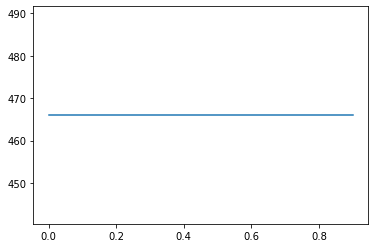

In [19]:
#we dont have any columns with zero varaince..Lets see by passing threshold values

#thresholds to check
thresholds = np.arange(0.0, 1, 0.1)
# apply transform with each threshold
results = list()
for t in thresholds:
    # define the transform
    tr1 = VarianceThreshold(threshold=t)
    # transform the input data
    p1data_new1 = transform.fit_transform(p1data_new)
    # determine the number of input features
    n_features = p1data_new1.shape[1]
    print('>Threshold=%.2f, Features=%d' % (t, n_features))
    # store the result
    results.append(n_features)
# plot the threshold vs the number of selected features
plt.plot(thresholds, results)
plt.show()

In [20]:
#check for Duplicate values
dups = p1data_new.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(p1data_new[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, ...]
Index: []

[0 rows x 466 columns]


In [21]:
#we dont have any duplicate values in our dataset

<AxesSubplot:>

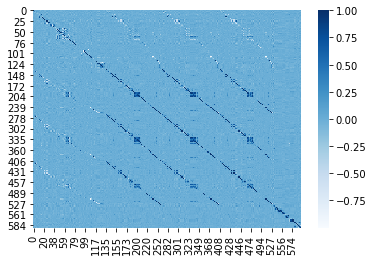

In [22]:
sns.heatmap(p1data_new.corr(), center=0, cmap='Blues')

In [23]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = p1data_new.corr().abs()
corr_matrix.head()

0         1         2         3         4         6         7  \
0  1.000000  0.150884  0.007326  0.002906  0.010464  0.004933  0.031245   
1  0.150884  1.000000  0.000625  0.013049  0.001961  0.029867  0.012137   
2  0.007326  0.000625  1.000000  0.305156  0.095999  0.128099  0.094480   
3  0.002906  0.013049  0.305156  1.000000  0.057663  0.672951  0.127726   
4  0.010464  0.001961  0.095999  0.057663  1.000000  0.073703  0.345223   

          8         9        10  ...       580       581       582       583  \
0  0.056823  0.010239  0.005379  ...  0.069764  0.068390  0.000077  0.024629   
1  0.031521  0.024827  0.009714  ...  0.055204  0.060255  0.043717  0.002806   
2  0.023635  0.011642  0.069124  ...  0.012091  0.036838  0.008599  0.014952   
3  0.102602  0.061989  0.048916  ...  0.012005  0.005858  0.006240  0.024707   
4  0.025916  0.053963  0.006490  ...  0.013564  0.107735  0.044925  0.001332   

        584       585       586       587       588       589  
0  0.020824  0.024787  0.021988  0.024435  0.026770  0.005920  
1  0.001287  0.002150  0.009520  0.016823  0.009610  0.044114  
2  0.017637  0.015043  0.023530  0.029327  0.030937  0.034836  
3  0.024083  0.025353  0.036437  0.039247  0.033967  0.082489  
4  0.001627  0.001643  0.043810  0.030998  0.026100  0.050779  

[5 rows x 466 columns]

In [24]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

0         1         2         3         4         6         7         8  \
0 NaN  0.150884  0.007326  0.002906  0.010464  0.004933  0.031245  0.056823   
1 NaN       NaN  0.000625  0.013049  0.001961  0.029867  0.012137  0.031521   
2 NaN       NaN       NaN  0.305156  0.095999  0.128099  0.094480  0.023635   
3 NaN       NaN       NaN       NaN  0.057663  0.672951  0.127726  0.102602   
4 NaN       NaN       NaN       NaN       NaN  0.073703  0.345223  0.025916   

          9        10  ...       580       581       582       583       584  \
0  0.010239  0.005379  ...  0.069764  0.068390  0.000077  0.024629  0.020824   
1  0.024827  0.009714  ...  0.055204  0.060255  0.043717  0.002806  0.001287   
2  0.011642  0.069124  ...  0.012091  0.036838  0.008599  0.014952  0.017637   
3  0.061989  0.048916  ...  0.012005  0.005858  0.006240  0.024707  0.024083   
4  0.053963  0.006490  ...  0.013564  0.107735  0.044925  0.001332  0.001627   

        585       586       587       588       589  
0  0.024787  0.021988  0.024435  0.026770  0.005920  
1  0.002150  0.009520  0.016823  0.009610  0.044114  
2  0.015043  0.023530  0.029327  0.030937  0.034836  
3  0.025353  0.036437  0.039247  0.033967  0.082489  
4  0.001643  0.043810  0.030998  0.026100  0.050779  

[5 rows x 466 columns]

In [25]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 206 columns to remove.


In [26]:
#Drop correlated Features
p1data_new = p1data_new.drop(columns = to_drop)

print("shape of after removing is ", p1data_new.shape)

shape of after removing is  (1567, 260)


In [27]:
p1data_new= p1data_new.join(p1data['Pass/Fail'])
p1data_new.head(5)

0        1          2          3       4         6       7       8  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133  0.1242  1.5005   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433  0.1247  1.4966   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878  0.1241  1.4436   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367  0.1217  1.4882   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967  0.1235  1.5031   

        9      10  ...     573     578     579       581     582     583  \
0  0.0162 -0.0034  ...  0.3157  0.0200  0.0098    0.0000  0.5005  0.0118   
1 -0.0005 -0.0148  ...  0.2653  0.0096  0.0201  208.2045  0.5019  0.0223   
2  0.0041  0.0013  ...  0.1882  0.0584  0.0484   82.8602  0.4958  0.0157   
3 -0.0124 -0.0033  ...  0.1738  0.0202  0.0149   73.8432  0.4990  0.0103   
4 -0.0031 -0.0072  ...  0.2224  0.0200  0.0098    0.0000  0.4800  0.4766   

      586     587       589  Pass/Fail  
0  0.0184  0.0112    0.0000         -1  
1  0.0096  0.0201  208.2045         -1  
2  0.0584  0.0484   82.8602          1  
3  0.0202  0.0149   73.8432         -1  
4  0.0202  0.0149   73.8432         -1  

[5 rows x 261 columns]

In [28]:
print("shape of original dataset is ", p1data.shape)
print("shape of dataset after removing columns is ", p1data_new.shape)

shape of original dataset is  (1567, 592)
shape of dataset after removing columns is  (1567, 261)


We have 592 features in original dataset.

Dropped time feature as cant predit much with it and dropped all <1% unique value features as these wont contribute much to output and Dropped all highly correlated features from dataset.

we have reduced 592 features to 261 features.

In [29]:
p1data_x1 = p1data_new.copy()

In [29]:
p1data_new.skew()

0             0.513620
1            -0.043809
2            -0.285418
3             1.712950
4            19.734109
               ...    
583          24.416505
586           1.438863
587           1.948370
589           2.713682
Pass/Fail     3.487359
Length: 261, dtype: float64

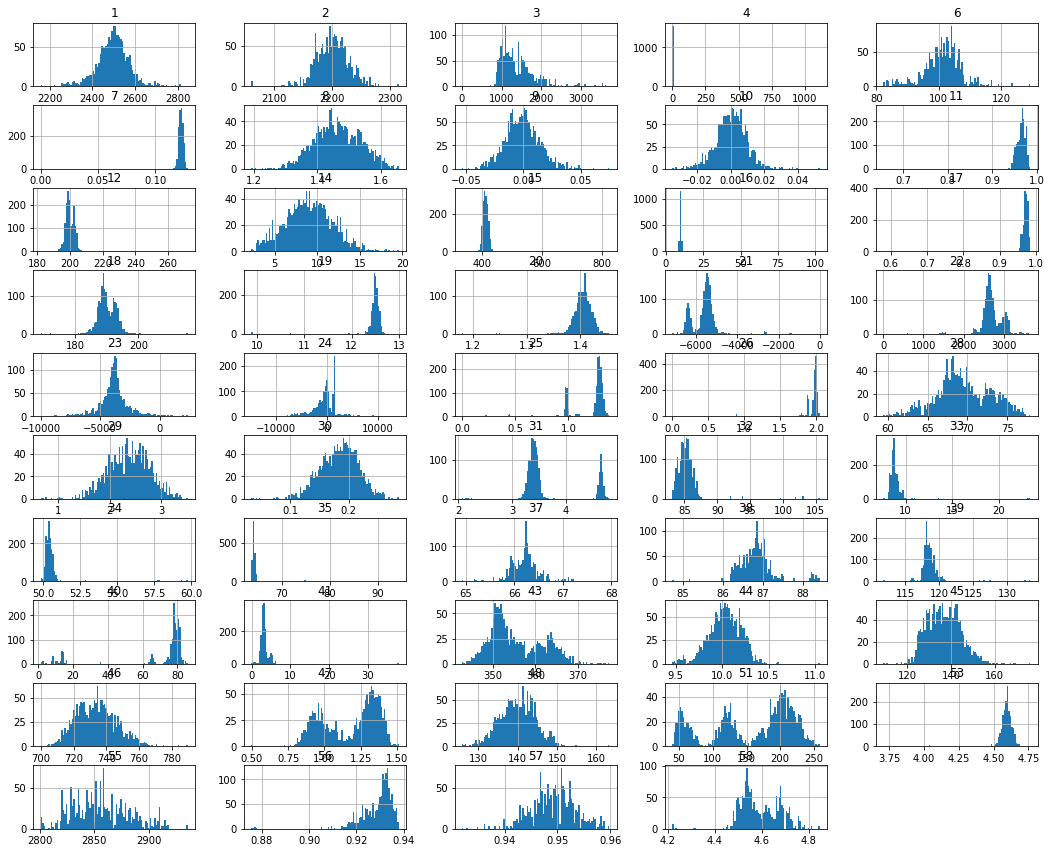

In [45]:
columns = list(p1data_new.iloc[:,1:50]) 
p1data[columns].hist(stacked=False, bins=100, figsize=(18,30), layout=(20,5)); 

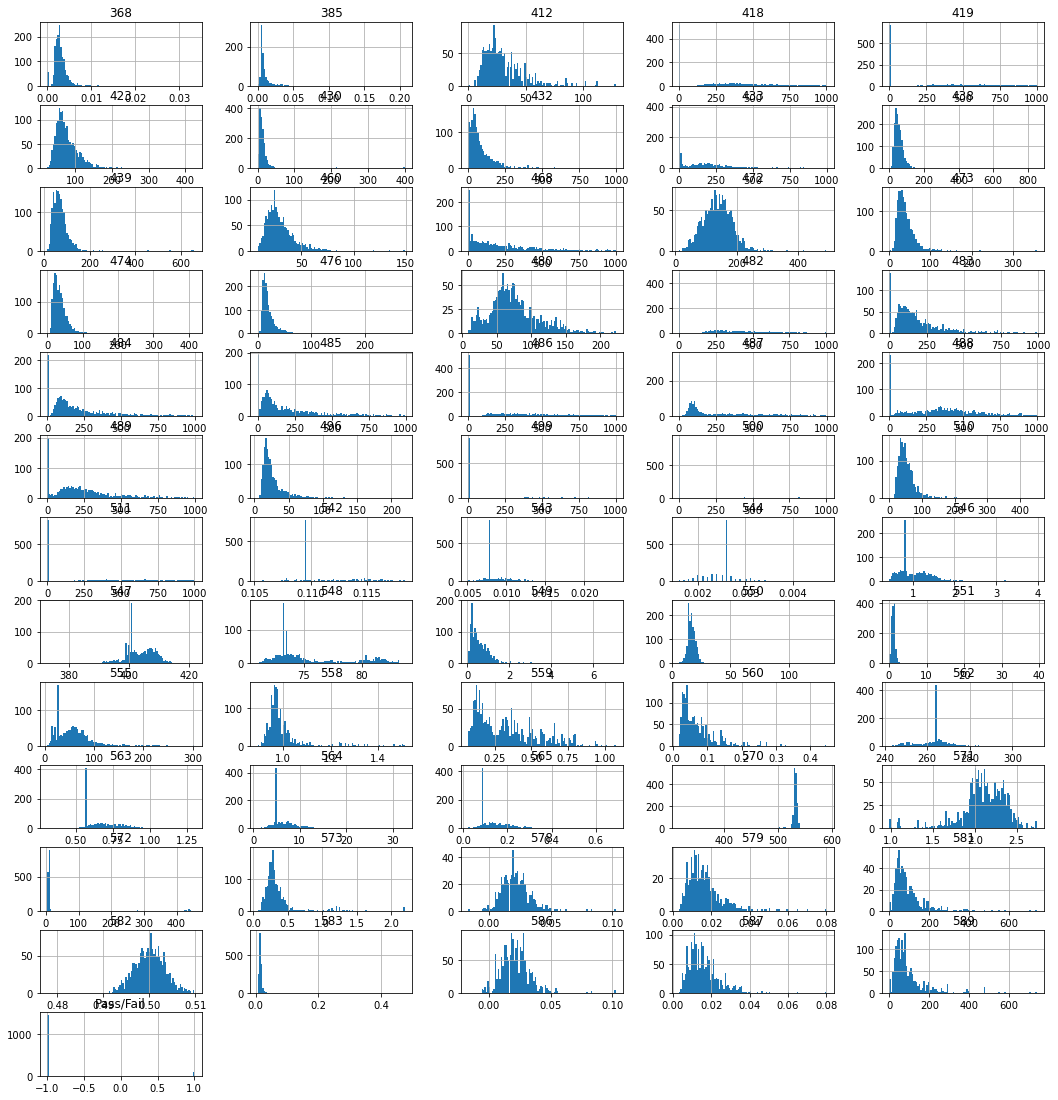

In [46]:
columns = list(p1data_new.iloc[:,200:261]) 
p1data[columns].hist(stacked=False, bins=100, figsize=(18,30), layout=(20,5)); 

In [47]:
#From above histograms we can idenitfy the distribution is not normal. Data is positive skewed and negative skwed.

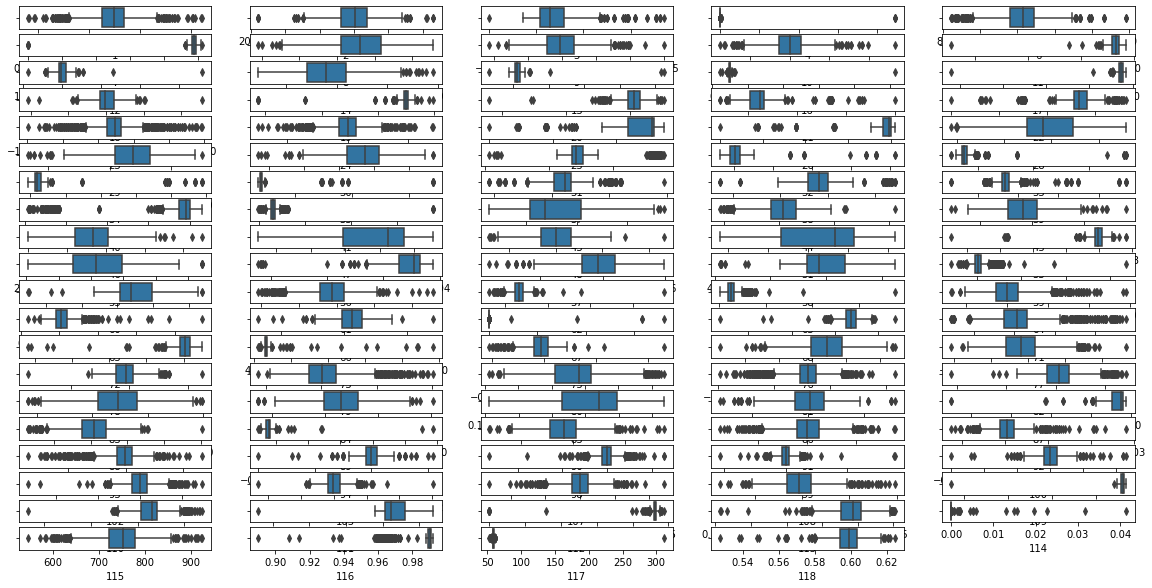

In [53]:
count=1
list1=list(p1data_new.iloc[:,1:100]) 
plt.subplots(figsize=(20, 10))
for col in list1:
    plt.subplot(20,5,count)
    sns.boxplot(x=p1data[col])
    count+=1

plt.show()

From above box plot we can understand lot of outliers exist in data. SO we need data normalization to reduce skewness and reduce outliers presence.

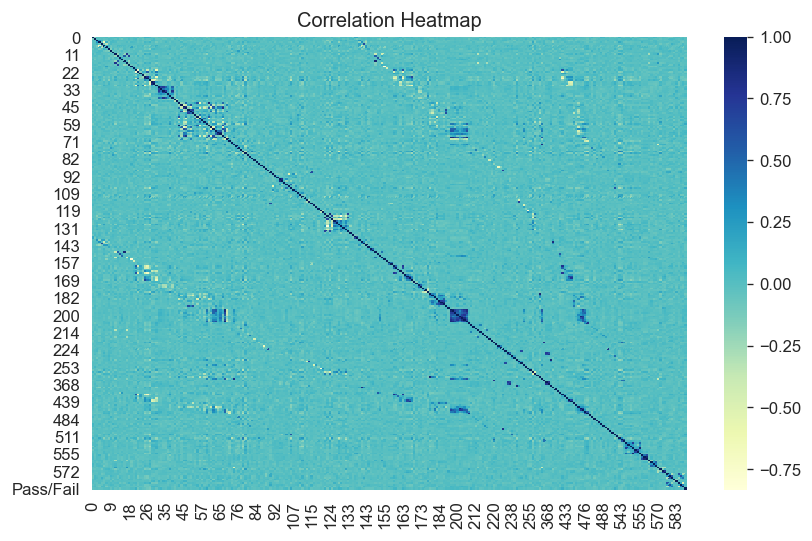

In [60]:
plt.figure(dpi = 120,figsize= (8,5))
sns.heatmap(p1data_new.corr(),cmap = 'YlGnBu')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#As we have removed highly correlated features(>0.9) during data cleaning, we can observe not much correlated features.

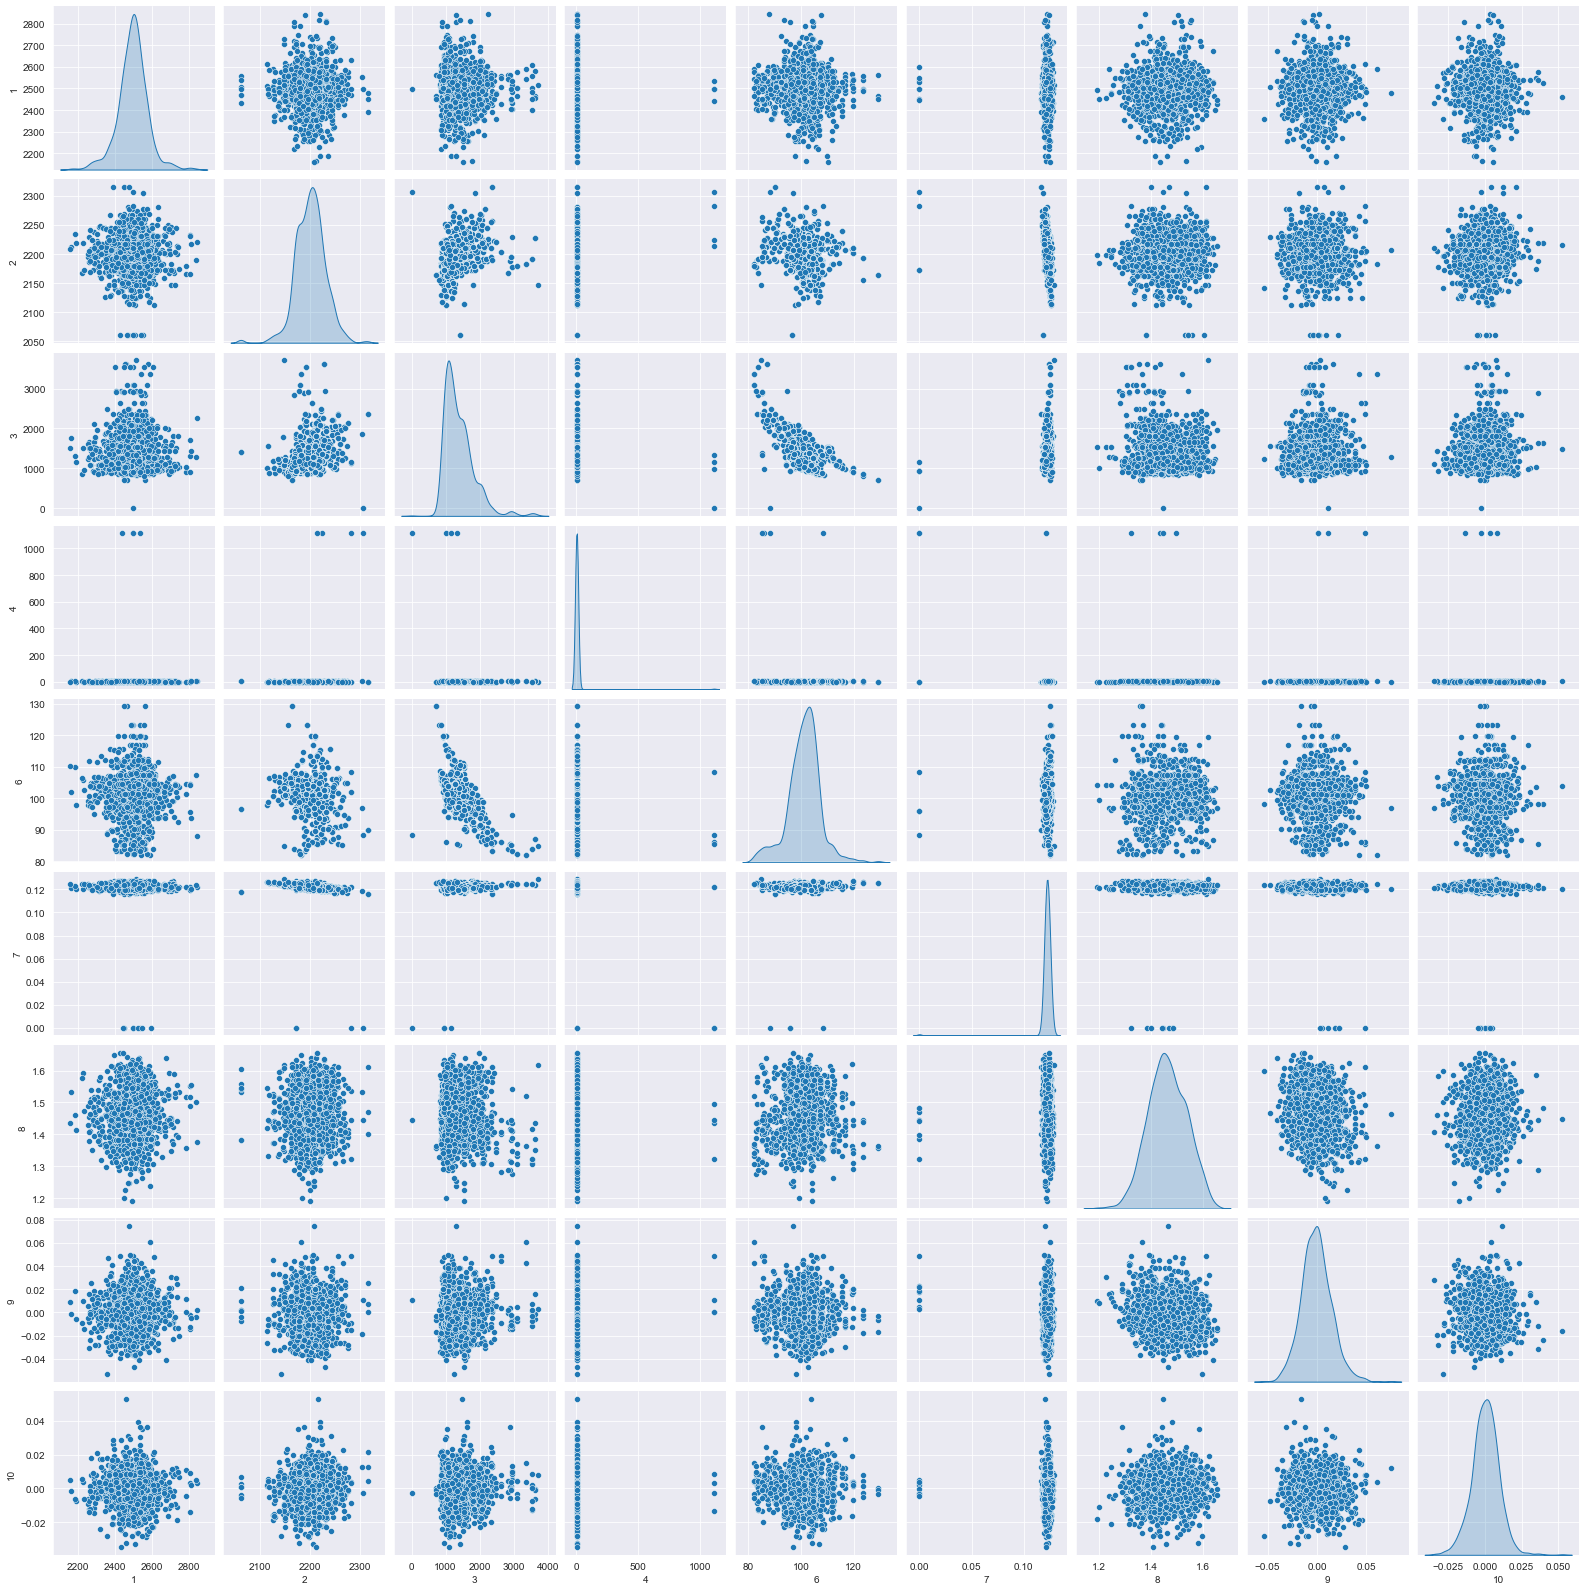

In [87]:
sns.pairplot(p1data_new.iloc[:,1:10],diag_kind='kde')

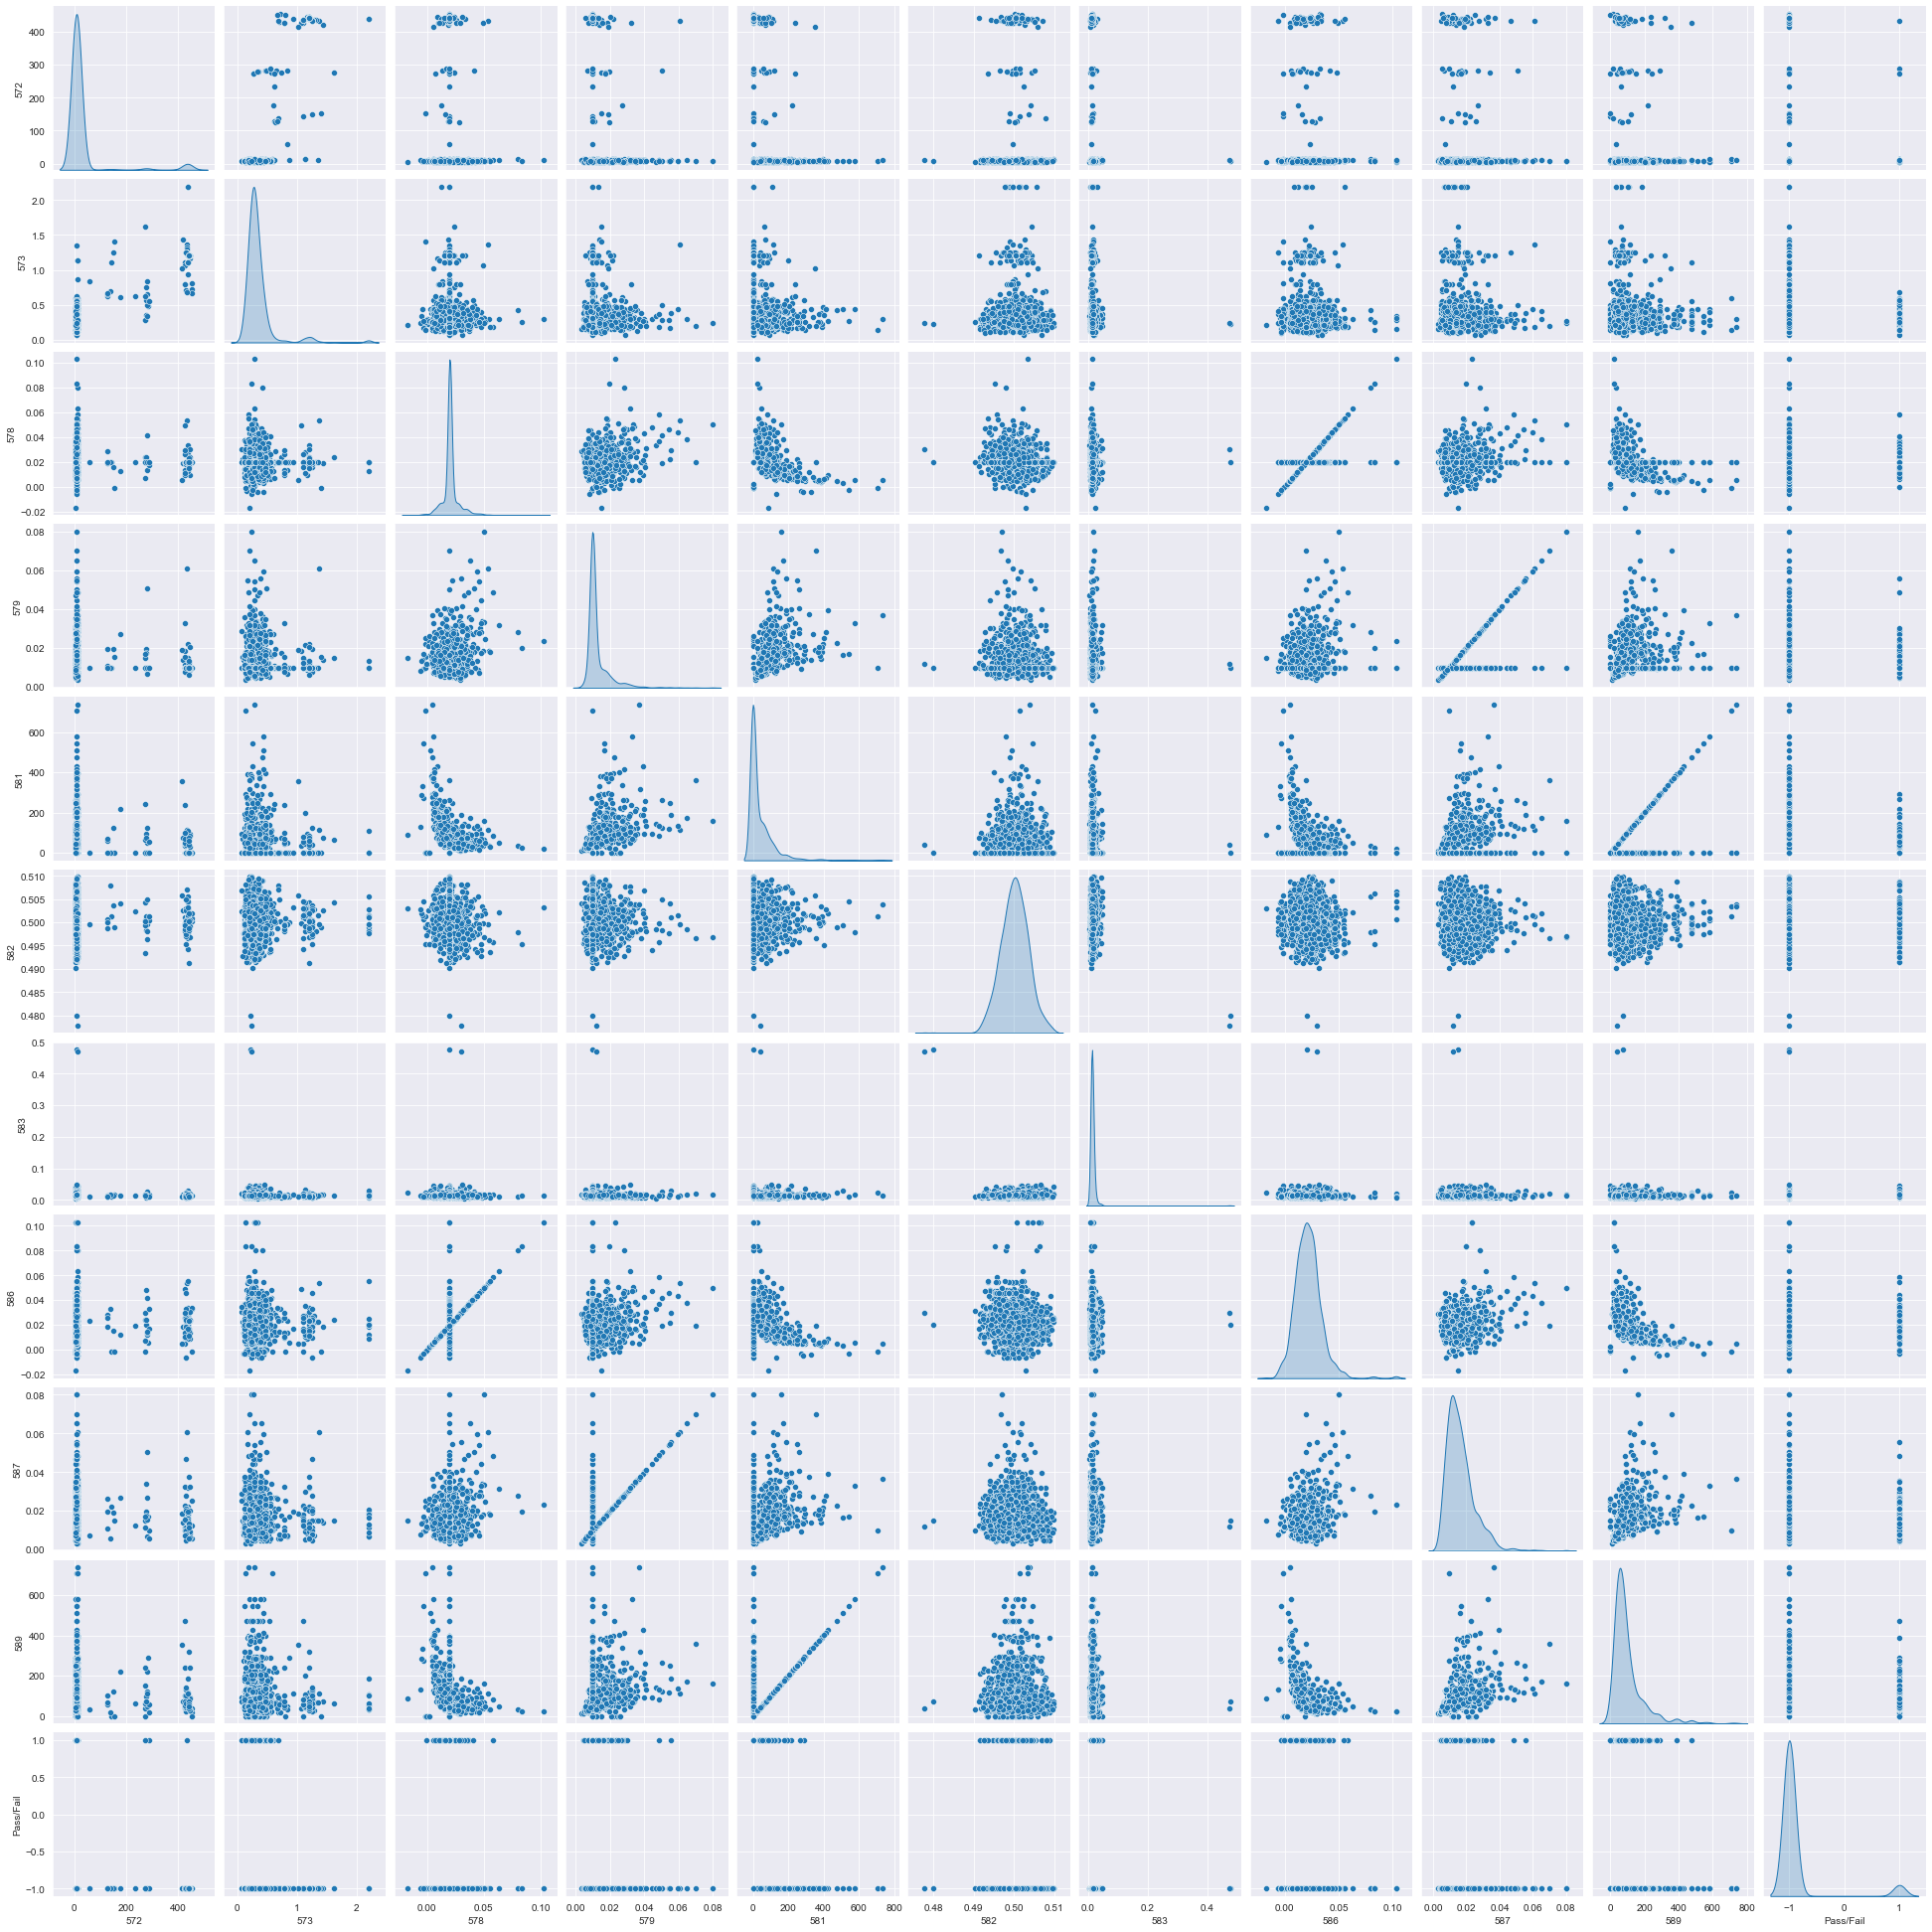

In [76]:
sns.pairplot(p1data_new.iloc[:,250:261],diag_kind='kde')

In [ ]:
#From above pairplots we can understand that no correlation exists among few features and data is not normally distributed

Segregate Predictors vs target varaibles

In [30]:
p1data_new.columns

Index(['0', '1', '2', '3', '4', '6', '7', '8', '9', '10',
       ...
       '573', '578', '579', '581', '582', '583', '586', '587', '589',
       'Pass/Fail'],
      dtype='object', length=261)

Target Variable is 'Pass/Fail'

All remianing varaibles are our predictor varaibles

In [31]:
p1data_new['Pass/Fail'].value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

<AxesSubplot:>

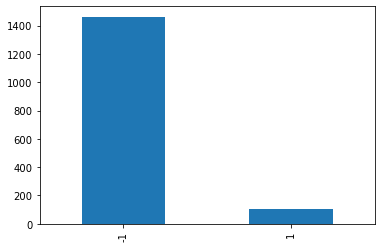

In [32]:
pd.value_counts(p1data_new['Pass/Fail']).plot(kind="bar")

Target Variable data is imbalanced Pass Class Holds the data 93.3% where as Fail Classholds data of 6.6%.

In [33]:
X=p1data_new.drop(['Pass/Fail'],axis=1)
y=p1data_new['Pass/Fail']

In [34]:
from sklearn.preprocessing import PowerTransformer
# perform a yeo-johnson transform of the dataset to 
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(X)
# convert the array back to a dataframe
X_pt = pd.DataFrame(data)
X_pt.columns = X.columns

In [35]:
X_pt.head(5)

0         1         2         3         4         6         7  \
0  0.283151  0.848137 -0.449985  0.148286  0.271206 -0.563947  0.855812   
1  1.113474 -0.388420  1.027700  0.273439 -1.530641  0.193643  1.149275   
2 -1.134519  0.796996 -0.493917  0.796985  0.613353 -0.899736  0.798870   
3 -0.298457 -0.204960 -0.070096 -1.247632  0.171091  0.500833 -0.409074   
4  0.302283  0.081360  1.133959 -0.060174  0.661790 -0.119849  0.468990   

          8         9        10  ...       572       573       578       579  \
0  0.501056  1.126217 -0.376311  ...  0.140401  0.207642 -0.015193 -0.402384   
1  0.447533  0.068901 -1.618001  ... -1.644824 -0.262540 -1.747875  1.689712   
2 -0.272756  0.370814  0.130303  ...  0.798752 -1.221717  3.886130  2.205453   
3  0.332494 -0.752140 -0.365500  ...  0.276176 -1.442121  0.014467  1.036616   
4  0.536778 -0.105496 -0.788179  ...  0.094823 -0.754281 -0.015193 -0.402384   

        581       582       583       586       587       589  
0 -0.795115  0.090797 -0.616264 -0.159620 -0.597194 -3.140713  
1  1.442237  0.511624  1.597755 -1.038414  0.698993  1.312256  
2  1.279761 -1.251117  0.460148  2.444357  2.264423  0.083815  
3  1.255881 -0.349151 -1.144454  0.003064  0.023298 -0.050534  
4 -0.795115 -5.050028  2.993148  0.003064  0.023298 -0.050534  

[5 rows x 260 columns]

In [36]:
from imblearn.combine import SMOTETomek

sm = SMOTETomek(random_state=139)
#X_sm and y_sm is the resampled data
X_sm, y_sm = sm.fit_resample(X_pt, y)

In [37]:
X_sm.shape

(2926, 260)

In [38]:
print('Original X shape: ', X.shape)
print('Original y shape: ', y.shape)
print('SMOTE X shape: ', X_sm.shape)
print('SMOTE y shape: ', y_sm.shape)

Original X shape:  (1567, 260)
Original y shape:  (1567,)
SMOTE X shape:  (2926, 260)
SMOTE y shape:  (2926,)


In [39]:
#split data into Train ,validation and Test
from sklearn.model_selection import train_test_split

x_tr, x_test, y_tr, y_test = train_test_split(X_sm, y_sm,test_size=0.2,train_size=0.8,random_state=1)
x_train, x_cv, y_train, y_cv = train_test_split(x_tr,y_tr,test_size = 0.25,train_size =0.75)

In [40]:
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)
print('x_cv shape: ', x_cv.shape)
print('y_cv shape: ', y_cv.shape)

x_train shape:  (1755, 260)
y_train shape:  (1755,)
x_test shape:  (586, 260)
y_test shape:  (586,)
x_cv shape:  (585, 260)
y_cv shape:  (585,)


In [41]:
print("Original Pass Values    : {0} ({1:0.2f}%)".format(len(p1data_new.loc[p1data_new['Pass/Fail'] == -1]), (len(p1data_new.loc[p1data_new['Pass/Fail'] == -1])/len(p1data_new.index)) * 100))
print("Original Fail Values    : {0} ({1:0.2f}%)".format(len(p1data_new.loc[p1data_new['Pass/Fail'] == 1]), (len(p1data_new.loc[p1data_new['Pass/Fail'] == 1])/len(p1data_new.index)) * 100))
print("")
print("Training Pass Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == -1]), (len(y_train[y_train[:] == -1])/len(y_train)) * 100))
print("Training Fail Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("")
print("Test Pass Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == -1]), (len(y_test[y_test[:] == -1])/len(y_test)) * 100))
print("Test Fail Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("")
print("CV set Pass Values        : {0} ({1:0.2f}%)".format(len(y_cv[y_cv[:] == -1]), (len(y_cv[y_cv[:] == -1])/len(y_test)) * 100))
print("CV set Fail Values        : {0} ({1:0.2f}%)".format(len(y_cv[y_cv[:] == 1]), (len(y_cv[y_cv[:] == 1])/len(y_test)) * 100))

Original Pass Values    : 1463 (93.36%)
Original Fail Values    : 104 (6.64%)

Training Pass Values    : 866 (49.34%)
Training Fail Values    : 889 (50.66%)

Test Pass Values        : 300 (51.19%)
Test Fail Values        : 286 (48.81%)

CV set Pass Values        : 297 (50.68%)
CV set Fail Values        : 288 (49.15%)


In [42]:
x_train.shape[1]

260

In [43]:
#define a function to plot confusion matrix
def confusion_matrix_plot(x_train,y_train,x_test,y_test,classifier,y_pred,classifier_name):
    fig,ax = plt.subplots(figsize=(7,6))
    plot_confusion_matrix(classifier,x_test,y_test,display_labels=["Pass","Fail"],normalize=None, ax=ax)
    ax.set_title(f'{classifier_name} - confusion matrix')
    plt.show()
    
    print(f'Accuracy Score Test: {accuracy_score(y_test,y_pred)}')
    print(f'Accuracy Score Train: {classifier.score(x_train,y_train)}')
    return print("")

In [44]:
#define a function to plot ROC curve and AUC score
def roc_curve_auc_score(x_test,y_test,y_pred_prob,classifier_name):
    y_pred_proba = y_pred_prob[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=f'{classifier_name}')
    plt.xlabel("false positive Rate")
    plt.ylabel("True positive Rate")
    plt.title(f'{classifier_name} - ROC curve')
    plt.show()
    global score
    score = roc_auc_score(y_test, y_pred_proba)
    return print(f'AUC SCore (ROC): {score} \n')

In [45]:
#define a function to plot precision recall curve and F1 score and AUC score

def precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob,classifier_name):
    y_pred_proba = y_pred_prob[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
    
    plt.plot(recall, precision, label=f'{classifier_name}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f'{classifier_name} - Precision Recall curve')
    plt.show()
    global f1_score_result,auc_score_result
    f1_score_result, auc_score_result = f1_score(y_test, y_pred), auc(recall, precision)
    
    return print(f'F1 score: {f1_score_result} \nAUC Score (PR): {auc_score_result}\n')

#Model training

In [46]:
#Build Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [47]:
#scoring decision Tree
print('accuracy score of decision tree Train set is',dTree.score(x_train, y_train))
print('accuracy score of decision tree Test set is', dTree.score(x_test, y_test))

accuracy score of decision tree Train set is 1.0
accuracy score of decision tree Test set is 0.9044368600682594


In [48]:
#Training set score is 1 where as Test set score is about 85.6%..lets reduce overfitting with pruning

In [49]:
#Reducing Overfitting

dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

print('accuracy score of Pruned decision tree Train set is', dTreeR.score(x_train, y_train))
print('accuracy score of Pruned decision tree Test  set is',dTreeR.score(x_test, y_test))

accuracy score of Pruned decision tree Train set is 0.7663817663817664
accuracy score of Pruned decision tree Test  set is 0.773037542662116


In [50]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

weights= pd.DataFrame({'feature': list(x_train.columns), 'importance': dTreeR.feature_importances_}).sort_values('importance', ascending = False)
weights[weights['importance'] > 0]

feature  importance
50       59    0.421764
222     486    0.177451
230     511    0.136780
102     121    0.117887
236     548    0.089606
85      100    0.044543
18       20    0.011969

In [51]:
#From above we can understand we have only 7 features with non-zero importance and 253 features with zero importance
zero_features = list(weights[weights['importance'] == 0.0]['feature'])
len(zero_features)

253

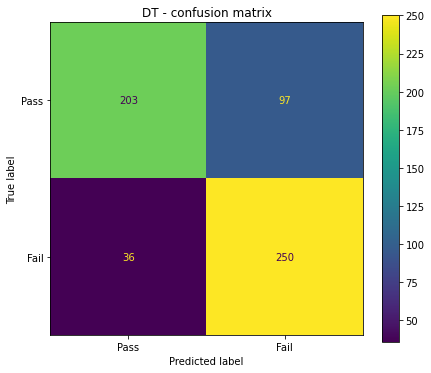

Accuracy Score Test: 0.773037542662116
Accuracy Score Train: 0.7663817663817664



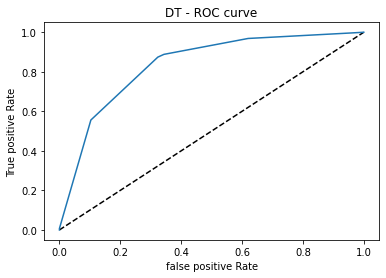

AUC SCore (ROC): 0.8348368298368298 



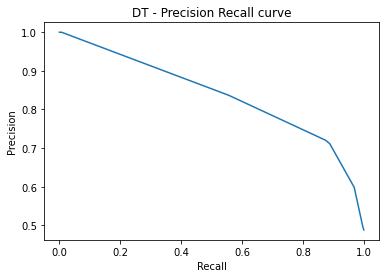

F1 score: 0.7898894154818324 
AUC Score (PR): 0.8386392672318889



In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = dTreeR.predict(x_test)
y_pred_prob = dTreeR.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, dTreeR, y_pred, 'DT')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'DT')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'DT')

In [53]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': [dTreeR.score(x_train, y_train)],'Test accuracy':[dTreeR.score(x_test,y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.766382       0.773038       0.834837  0.789889   

   PR AUC_Score  
0      0.838639

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(x_train, y_train)

print('accuracy score of Random Forest tree Train set is', rfcl.score(x_train, y_train))
print('accuracy score of Random Forest tree Test  set is',rfcl.score(x_test, y_test))

accuracy score of Random Forest tree Train set is 1.0
accuracy score of Random Forest tree Test  set is 0.9880546075085325


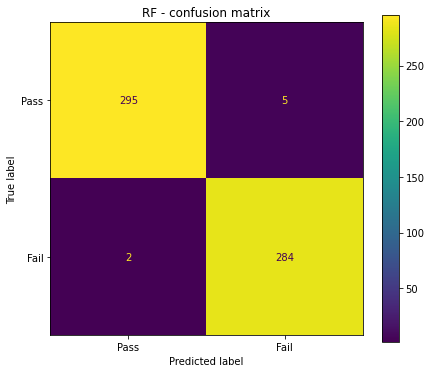

Accuracy Score Test: 0.9880546075085325
Accuracy Score Train: 1.0



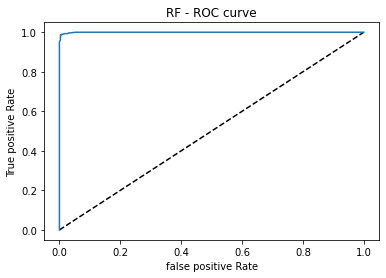

AUC SCore (ROC): 0.9995804195804195 



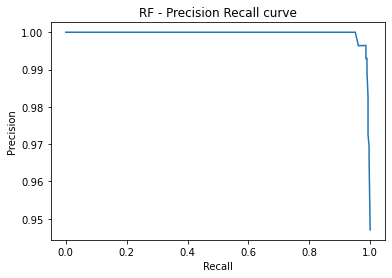

F1 score: 0.9878260869565217 
AUC Score (PR): 0.9995669576785104



In [55]:
y_pred = rfcl.predict(x_test)
y_pred_prob = rfcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, rfcl, y_pred, 'RF')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'RF')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'RF')

In [56]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'],'Train accuracy': [rfcl.score(x_train, y_train)], 'Test accuracy': [rfcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.766382       0.773038       0.834837  0.789889   
0  Random Forest        1.000000       0.988055       0.999580  0.987826   

   PR AUC_Score  
0      0.838639  
0      0.999567

In [57]:
#let us first observe the accuracies for different values of k for KNN
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

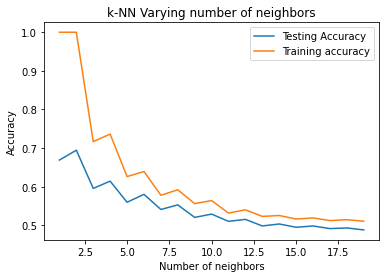

In [58]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [59]:
# #We can observe above that we get maximum testing accuracy for k=2. So lets create a KNeighborsClassifier with number of neighbors as 2.

# instantiate learning model (k = 2)
knn = KNeighborsClassifier(n_neighbors=2)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
y_pred = knn.predict(x_test)

# evaluate accuracy
print("Accuracy score for K=2 is ",accuracy_score(y_test, y_pred))

Accuracy score for K=2 is  0.6945392491467577


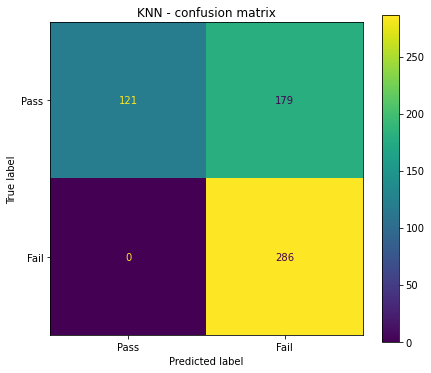

Accuracy Score Test: 0.6945392491467577
Accuracy Score Train: 1.0



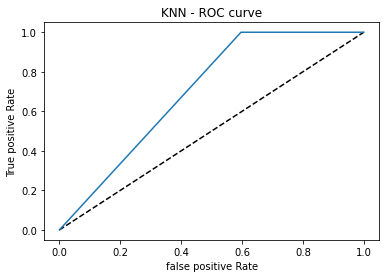

AUC SCore (ROC): 0.7016666666666667 



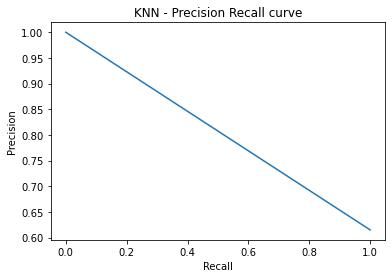

F1 score: 0.7616511318242344 
AUC Score (PR): 0.8075268817204302



In [60]:
y_pred = knn.predict(x_test)
y_pred_prob = knn.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, knn, y_pred, 'KNN')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'KNN')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'KNN')

In [61]:
tempResultsDf = pd.DataFrame({'Method':['KNN'],'Train accuracy': [knn.score(x_train, y_train)], 'Test accuracy': [knn.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.766382       0.773038       0.834837  0.789889   
0  Random Forest        1.000000       0.988055       0.999580  0.987826   
0            KNN        1.000000       0.694539       0.701667  0.761651   

   PR AUC_Score  
0      0.838639  
0      0.999567  
0      0.807527

In [63]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
nb = GaussianNB()

nb.fit(x_train, y_train.ravel())

#Performance of model with training data
train_predict = nb.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

#Performance of model with test data
test_predict = nb.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))

Model Accuracy with Train Data: 0.8564

Model Accuracy with Test Data: 0.8549


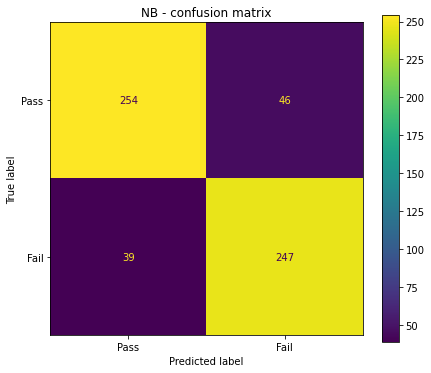

Accuracy Score Test: 0.8549488054607508
Accuracy Score Train: 0.8564102564102564



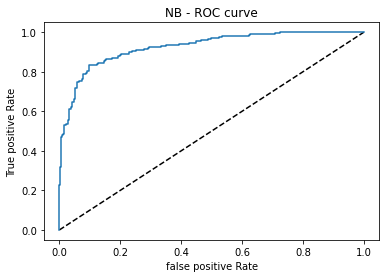

AUC SCore (ROC): 0.9256993006993006 



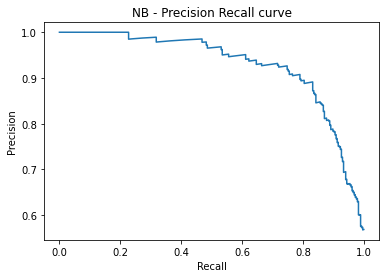

F1 score: 0.853195164075993 
AUC Score (PR): 0.9287146296063937



In [64]:
y_pred = nb.predict(x_test)
y_pred_prob = nb.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, nb, y_pred, 'NB')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'NB')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'NB')

In [65]:
tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'],'Train accuracy': [nb.score(x_train, y_train)], 'Test accuracy': [nb.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.766382       0.773038       0.834837  0.789889   
0  Random Forest        1.000000       0.988055       0.999580  0.987826   
0            KNN        1.000000       0.694539       0.701667  0.761651   
0    Naive Bayes        0.856410       0.854949       0.925699  0.853195   

   PR AUC_Score  
0      0.838639  
0      0.999567  
0      0.807527  
0      0.928715

In [66]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)

#Performance of model with training data
lrtrain_predict = lr.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, lrtrain_predict)))
print()

#Performance of model with test data
lrtest_predict = lr.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, lrtest_predict)))

Model Accuracy with Train Data: 0.9698

Model Accuracy with Test Data: 0.9130


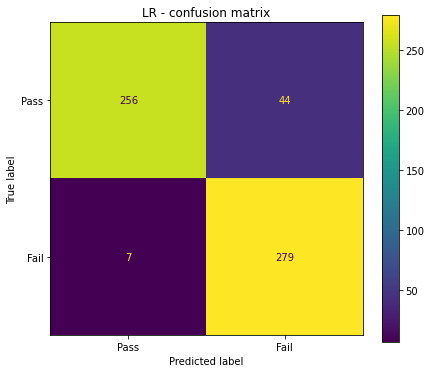

Accuracy Score Test: 0.9129692832764505
Accuracy Score Train: 0.9698005698005698



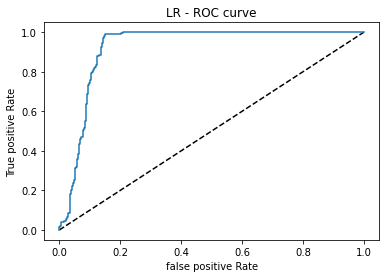

AUC SCore (ROC): 0.9234265734265734 



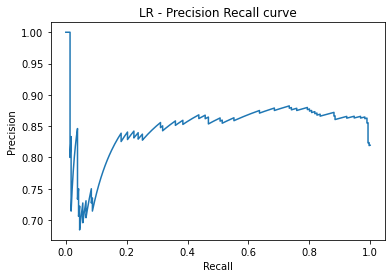

F1 score: 0.9162561576354679 
AUC Score (PR): 0.8478009643784501



In [67]:
y_pred = lr.predict(x_test)
y_pred_prob = lr.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, lr, y_pred, 'LR')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'LR')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'LR')

In [68]:
tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'],'Train accuracy': [lr.score(x_train, y_train)], 'Test accuracy': [lr.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.766382       0.773038       0.834837   
0        Random Forest        1.000000       0.988055       0.999580   
0                  KNN        1.000000       0.694539       0.701667   
0          Naive Bayes        0.856410       0.854949       0.925699   
0  Logistic Regression        0.969801       0.912969       0.923427   

   F1 Score  PR AUC_Score  
0  0.789889      0.838639  
0  0.987826      0.999567  
0  0.761651      0.807527  
0  0.853195      0.928715  
0  0.916256      0.847801

In [69]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data with default parameters
svc = SVC(probability=True)
svc.fit(x_train, y_train)

prediction = svc.predict(x_test)

# check the accuracy on the training set
print("Accuracy score of Train set -",svc.score(x_train, y_train))
print("Accuracy score of Test  set -",svc.score(x_test, y_test))

Accuracy score of Train set - 1.0
Accuracy score of Test  set - 0.9914675767918089


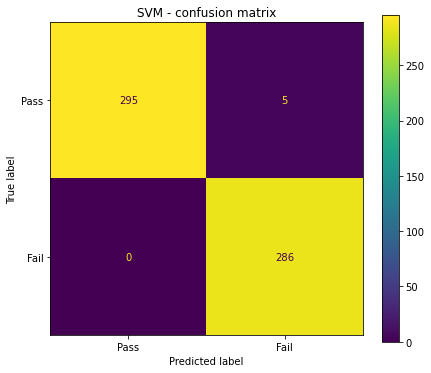

Accuracy Score Test: 0.9914675767918089
Accuracy Score Train: 1.0



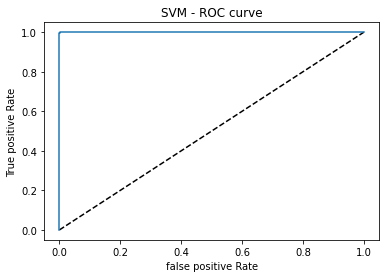

AUC SCore (ROC): 0.999988344988345 



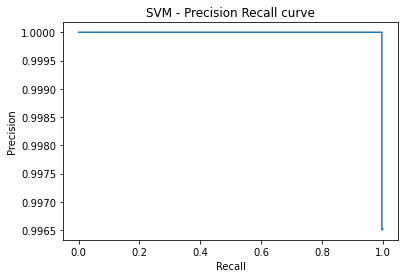

F1 score: 0.9913344887348353 
AUC Score (PR): 0.9999877957621433



In [70]:
y_pred = svc.predict(x_test)
y_pred_prob = svc.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, svc, y_pred, 'SVM')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'SVM')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'SVM')

In [71]:
tempResultsDf = pd.DataFrame({'Method':['SVM'],'Train accuracy': [svc.score(x_train, y_train)], 'Test accuracy': [svc.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.766382       0.773038       0.834837   
0        Random Forest        1.000000       0.988055       0.999580   
0                  KNN        1.000000       0.694539       0.701667   
0          Naive Bayes        0.856410       0.854949       0.925699   
0  Logistic Regression        0.969801       0.912969       0.923427   
0                  SVM        1.000000       0.991468       0.999988   

   F1 Score  PR AUC_Score  
0  0.789889      0.838639  
0  0.987826      0.999567  
0  0.761651      0.807527  
0  0.853195      0.928715  
0  0.916256      0.847801  
0  0.991334      0.999988

In [72]:
#out of all Methods Naive Bayes performed best without overfitting and test accuracy of 85.5% wand ROC AUC score of 93%

# prepare configuration for cross validation test harness


In [73]:
# Evaluate using K FOLD Cross Validation
from sklearn import model_selection

num_folds = 20
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(nb, x_train, y_train, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.89772727 0.77272727 0.76136364 0.89772727 0.78409091 0.90909091
 0.80681818 0.88636364 0.81818182 0.89772727 0.79545455 0.88636364
 0.86363636 0.81818182 0.81818182 0.7816092  0.91954023 0.8045977
 0.86206897 0.86206897]
Accuracy: 84.218% (4.992%)


In [74]:
#From K Fold Cross Validation we can observe average accuaracy is 85.18% and can get Max accuracy of 88.79%. 

In [75]:
# Evaluate using startified K FOLD Cross Validation

num_folds = 20
seed = 7

Stratkfold = StratifiedKFold(n_splits=num_folds, random_state=seed)

results = cross_val_score(nb, x_train, y_train, cv=Stratkfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.89772727 0.77272727 0.78409091 0.88636364 0.78409091 0.88636364
 0.86363636 0.81818182 0.86363636 0.88636364 0.80681818 0.86363636
 0.875      0.85227273 0.77272727 0.79310345 0.91954023 0.8045977
 0.88505747 0.85057471]
Accuracy: 84.333% (4.550%)


In [76]:
#From Startified K Fold Cross Validation we can observe average accuaracy is 85.23% and can get Max accuracy of 88.9%. 

In [77]:
loocv =LeaveOneOut()

results = cross_val_score(nb, x_train, y_train, cv=loocv)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[1. 1. 1. ... 1. 1. 1.]
Accuracy: 84.672% (36.025%)


In [78]:
#Average Accuracy we get from LOOCV is 85.35%. LOOCV is very costly shouldnt be used on large datasets

# Hyper Parameter Tuning

In [79]:
nb.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

kfold = KFold(n_splits=20, random_state=7)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Random search of parameters
nb_random = RandomizedSearchCV(estimator = nb, 
                 param_distributions=params_NB, 
                 cv=kfold,  
                 verbose=1, 
                 scoring='accuracy')
# Fit the random search model
nb_random.fit(x_cv, y_cv)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    4.5s finished


RandomizedSearchCV(cv=KFold(n_splits=20, random_state=7, shuffle=False),
                   estimator=GaussianNB(),
                   param_distributions={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.3...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='accuracy', verbose=1)

In [81]:
print('Naive Bayes - Best Parameters: ',nb_random.best_params_)

Naive Bayes - Best Parameters:  {'var_smoothing': 1.873817422860383e-05}


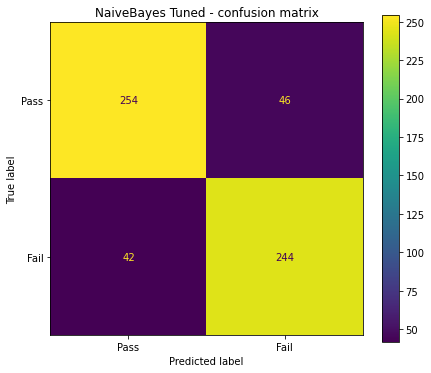

Accuracy Score Test: 0.8498293515358362
Accuracy Score Train: 0.8940170940170941



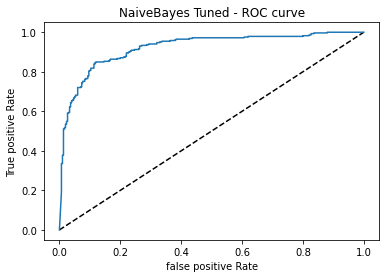

AUC SCore (ROC): 0.9223076923076923 



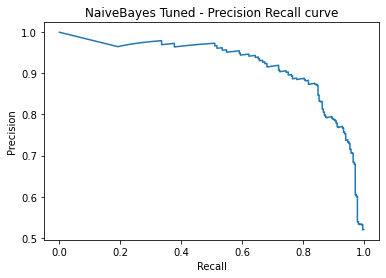

F1 score: 0.8472222222222222 
AUC Score (PR): 0.9204134530880942



In [82]:
y_pred = nb_random.predict(x_test)
y_pred_prob = nb_random.predict_proba(x_test)

confusion_matrix_plot(x_cv,y_cv,x_test,y_test, nb_random, y_pred, 'NaiveBayes Tuned')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'NaiveBayes Tuned')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'NaiveBayes Tuned')

In [83]:
tempResultsDf = pd.DataFrame({'Method':['NB Random Tuned'],'Train accuracy': [nb_random.score(x_cv, y_cv)], 'Test accuracy': [nb_random.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.766382       0.773038       0.834837   
0        Random Forest        1.000000       0.988055       0.999580   
0                  KNN        1.000000       0.694539       0.701667   
0          Naive Bayes        0.856410       0.854949       0.925699   
0  Logistic Regression        0.969801       0.912969       0.923427   
0                  SVM        1.000000       0.991468       0.999988   
0      NB Random Tuned        0.894017       0.849829       0.922308   

   F1 Score  PR AUC_Score  
0  0.789889      0.838639  
0  0.987826      0.999567  
0  0.761651      0.807527  
0  0.853195      0.928715  
0  0.916256      0.847801  
0  0.991334      0.999988  
0  0.847222      0.920413

In [84]:
#tuning with Grid Search CV

In [85]:
kfold = KFold(n_splits=20, random_state=7)
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_grid = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=kfold, 
                 verbose=1, 
                 scoring='accuracy') 
nb_grid.fit(x_cv, y_cv)

nb_grid.best_params_

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   46.2s finished


{'var_smoothing': 0.03511191734215131}

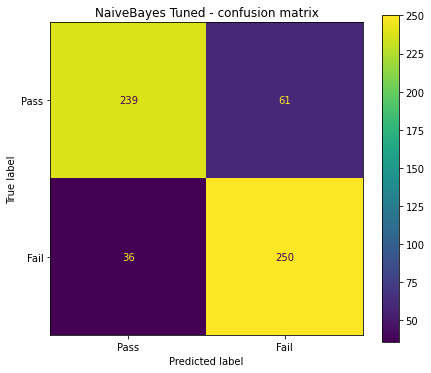

Accuracy Score Test: 0.8344709897610921
Accuracy Score Train: 0.8905982905982905



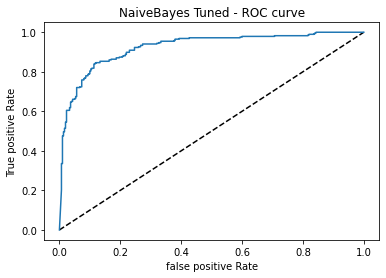

AUC SCore (ROC): 0.9243473193473194 



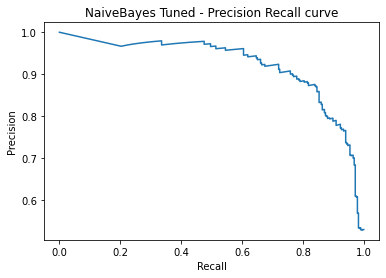

F1 score: 0.8375209380234506 
AUC Score (PR): 0.9228023668252328



In [86]:
y_pred = nb_grid.predict(x_test)
y_pred_prob = nb_grid.predict_proba(x_test)

confusion_matrix_plot(x_cv,y_cv,x_test,y_test, nb_grid, y_pred, 'NaiveBayes Tuned')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'NaiveBayes Tuned')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'NaiveBayes Tuned')

In [87]:
tempResultsDf = pd.DataFrame({'Method':['NB Grid Tuned'],'Train accuracy': [nb_grid.score(x_cv, y_cv)], 'Test accuracy': [nb_grid.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.766382       0.773038       0.834837   
0        Random Forest        1.000000       0.988055       0.999580   
0                  KNN        1.000000       0.694539       0.701667   
0          Naive Bayes        0.856410       0.854949       0.925699   
0  Logistic Regression        0.969801       0.912969       0.923427   
0                  SVM        1.000000       0.991468       0.999988   
0      NB Random Tuned        0.894017       0.849829       0.922308   
0        NB Grid Tuned        0.890598       0.834471       0.924347   

   F1 Score  PR AUC_Score  
0  0.789889      0.838639  
0  0.987826      0.999567  
0  0.761651      0.807527  
0  0.853195      0.928715  
0  0.916256      0.847801  
0  0.991334      0.999988  
0  0.847222      0.920413  
0  0.837521      0.922802

Naive Bayes makes very strong independence assumptions. So tuning hyper parameters did nt make any difference.

Lets check with LIGHTBGM about importance features

In [88]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(x_train.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [89]:
# Train using early stopping
model.fit(x_train, y_train, early_stopping_rounds=100, eval_set = [(x_cv, y_cv)], 
              eval_metric = 'auc', verbose = 200)
    
# Record the feature importances
feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.999684	valid_0's binary_logloss: 0.0332718
[400]	valid_0's auc: 0.999673	valid_0's binary_logloss: 0.0274315
Early stopping, best iteration is:
[303]	valid_0's auc: 0.999719	valid_0's binary_logloss: 0.0256418


In [90]:
feature_importances = pd.DataFrame({'feature': list(x_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head(5)

feature  importance
204     419       103.0
50       59        80.0
230     511        75.0
222     486        58.0
164     205        58.0

In [91]:
# Lets Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 12 features with 0.0 importance


feature  importance
46       55         0.0
95      114         0.0
78       90         0.0
73       85         0.0
130     157         0.0

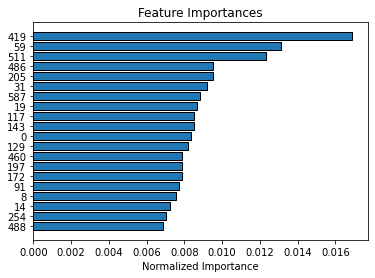

In [92]:
# Sort features according to importance
df = feature_importances.sort_values('importance', ascending = False).reset_index()
    
# Normalize the feature importances to add up to one
df['importance_normalized'] = df['importance'] / df['importance'].sum()

# Make a horizontal bar chart of feature importances
plt.figure(figsize = (6, 4))
ax = plt.subplot()
    
# Need to reverse the index to plot most important on top
ax.barh(list(reversed(list(df.index[:20]))), 
df['importance_normalized'].head(20), align = 'center', edgecolor = 'k')
    
# Set the yticks and labels
ax.set_yticks(list(reversed(list(df.index[:20]))))
ax.set_yticklabels(df['feature'].head(20))
    
# Plot labeling
plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
plt.show()

# Dimensional Reduction

In [46]:
pca = PCA(random_state=42)
pca.fit(X)

#generating the eigen values and the eigen vectors
#eigen vectors are the principal components and the corresponding eigen values which are the magnitudes of variance captured

# Eignen values
pca.explained_variance_

array([4.32259573e+07, 1.79183082e+07, 8.24075588e+06, 1.99733032e+06,
       1.13267102e+06, 2.63882448e+05, 2.17372053e+05, 2.00175358e+05,
       1.83868566e+05, 1.58168439e+05, 1.13654692e+05, 1.09384497e+05,
       1.04648534e+05, 1.00200019e+05, 9.35474536e+04, 8.49268567e+04,
       8.23296746e+04, 8.02942076e+04, 6.86023798e+04, 6.55761769e+04,
       6.20808993e+04, 5.71787809e+04, 5.13729540e+04, 5.08419147e+04,
       4.53531022e+04, 4.42095086e+04, 4.16874379e+04, 3.59340994e+04,
       2.62347083e+04, 1.12753710e+04, 1.05911859e+04, 1.01236053e+04,
       7.30953713e+03, 7.13250623e+03, 5.17394033e+03, 4.20960669e+03,
       4.10160177e+03, 3.53056982e+03, 3.20847948e+03, 3.12158680e+03,
       2.96745791e+03, 2.65107657e+03, 2.24552933e+03, 2.10903590e+03,
       1.75081684e+03, 1.61584757e+03, 1.32450689e+03, 1.20946289e+03,
       1.11369171e+03, 1.05452646e+03, 9.31808504e+02, 8.87027048e+02,
       8.55895233e+02, 7.62943369e+02, 7.39089933e+02, 6.17461132e+02,
      

In [47]:
# Eigen Vectors
pd.DataFrame(pca.components_)

0             1             2             3             4    \
0    7.185694e-04 -2.345949e-05 -2.764715e-04  2.792089e-03 -1.503692e-04   
1    1.817077e-04  7.275766e-04 -1.638334e-04 -1.090807e-03 -1.997928e-04   
2   -1.373911e-04 -1.707622e-03 -3.442924e-04 -6.992251e-03 -3.344626e-04   
3    2.731159e-03  2.019193e-04 -4.761397e-04  4.796485e-03 -2.903549e-04   
4   -5.740392e-04  3.979556e-03  3.395141e-04 -2.220233e-02 -1.992646e-04   
..            ...           ...           ...           ...           ...   
255  4.317165e-07  5.601828e-07  1.556095e-07 -2.001569e-07  4.732761e-07   
256 -1.765581e-07  5.706078e-08 -2.807275e-07  7.273016e-08 -2.713836e-07   
257  8.143818e-08  6.745409e-08  2.170247e-08  2.010810e-08  1.172341e-07   
258 -2.215324e-08 -2.173114e-08  9.442302e-08 -5.831016e-09  1.742332e-07   
259  2.015415e-09  1.015014e-08 -1.513071e-08  1.086789e-08  1.065285e-07   

              5             6             7             8             9    \
0   -8.876052e-05  4.269197e-08 -3.388628e-07 -2.924687e-08 -5.330835e-09   
1    1.296836e-06  5.464563e-08  4.811874e-07 -1.291972e-07  2.508005e-09   
2    9.249812e-05  4.143036e-08 -1.141551e-07  5.994459e-08 -5.341299e-08   
3   -1.145815e-04  8.962547e-08 -1.792674e-06  7.969086e-07  9.585186e-08   
4    2.288238e-04 -1.034862e-07  4.810946e-06 -1.590790e-07  6.429283e-07   
..            ...           ...           ...           ...           ...   
255  1.663659e-06 -9.019206e-04 -8.877510e-04 -2.184694e-05  1.448622e-03   
256  1.146205e-06 -1.513205e-04  1.497249e-04  7.212432e-06  2.872531e-04   
257 -1.748431e-06  1.454050e-03  1.099990e-05 -3.302315e-04  1.012629e-03   
258 -6.218173e-07  4.389826e-04 -8.978799e-06  2.002422e-04 -3.130435e-04   
259  5.675189e-08 -2.468628e-04 -1.389669e-05  1.394323e-04 -2.769898e-04   

     ...           250           251           252           253  \
0    ...  2.610390e-04 -4.216742e-08  1.700569e-08 -1.440965e-08   
1    ...  1.173587e-04 -1.526304e-06 -5.020646e-08 -2.442320e-08   
2    ... -5.190864e-04 -5.291582e-07  3.409130e-08 -1.727143e-08   
3    ... -1.451253e-03 -3.986094e-06 -5.542628e-08 -1.287734e-07   
4    ... -5.838079e-04  1.355849e-06 -5.376686e-08  5.493517e-07   
..   ...           ...           ...           ...           ...   
255  ...  1.350012e-07 -1.390071e-04  1.192874e-02 -2.349008e-02   
256  ... -1.139547e-07  3.416276e-05 -1.978421e-03  9.527963e-04   
257  ... -6.831579e-09 -8.433390e-06 -5.492984e-04  1.537710e-03   
258  ...  6.040849e-08 -3.016314e-05  1.098396e-04  4.522730e-04   
259  ... -2.175888e-09 -3.830629e-06 -1.275293e-04  4.339626e-05   

              254           255           256           257           258  \
0   -1.923043e-04  6.662328e-09 -4.718103e-08  7.881464e-08 -2.863577e-08   
1    5.819682e-05 -9.184026e-10 -7.738310e-08 -6.374280e-08  7.657381e-09   
2   -7.626659e-04 -2.518430e-08 -8.609530e-08  9.972788e-08 -1.805383e-09   
3   -6.419978e-05 -6.258904e-08 -1.601333e-07 -1.369820e-07 -2.291005e-07   
4    7.031139e-03 -1.184591e-07  6.259883e-07 -2.428289e-07  3.892747e-07   
..            ...           ...           ...           ...           ...   
255  1.310966e-06 -1.094301e-02 -1.385884e-03 -5.692537e-03  1.473028e-02   
256 -1.739885e-07 -4.891122e-03  3.572345e-04  8.446857e-04 -2.062778e-03   
257 -1.204073e-07  3.778299e-03  2.256143e-04 -3.090184e-04 -1.094935e-03   
258  2.018815e-08 -1.132885e-03  5.776044e-05  3.089094e-05 -1.604397e-04   
259 -2.115897e-08  4.229702e-04  1.117553e-04  1.295702e-05 -8.743276e-05   

              259  
0   -4.018450e-04  
1    2.594507e-04  
2   -7.180473e-04  
3    1.906597e-03  
4    3.745284e-03  
..            ...  
255 -1.006558e-06  
256  2.947291e-07  
257  7.430810e-08  
258 -1.093579e-08  
259  9.330099e-09  

[260 rows x 260 columns]

In [80]:
total = []
k=1
for i in pca.explained_variance_ratio_*100:
    total.append(i)
    print('Variance explained by Principle Component',k,'is : {:.2f}%'.format(i))
    k=k+1

Variance explained by Principle Component 1 is : 57.67%
Variance explained by Principle Component 2 is : 23.91%
Variance explained by Principle Component 3 is : 10.99%
Variance explained by Principle Component 4 is : 2.66%
Variance explained by Principle Component 5 is : 1.51%
Variance explained by Principle Component 6 is : 0.35%
Variance explained by Principle Component 7 is : 0.29%
Variance explained by Principle Component 8 is : 0.27%
Variance explained by Principle Component 9 is : 0.25%
Variance explained by Principle Component 10 is : 0.21%
Variance explained by Principle Component 11 is : 0.15%
Variance explained by Principle Component 12 is : 0.15%
Variance explained by Principle Component 13 is : 0.14%
Variance explained by Principle Component 14 is : 0.13%
Variance explained by Principle Component 15 is : 0.12%
Variance explained by Principle Component 16 is : 0.11%
Variance explained by Principle Component 17 is : 0.11%
Variance explained by Principle Component 18 is : 0.11

In [49]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.57670212, 0.81576048, 0.9257051 , 0.95235262, 0.96746423,
       0.97098484, 0.97388492, 0.97655558, 0.97900867, 0.98111889,
       0.98263522, 0.98409458, 0.98549076, 0.98682758, 0.98807565,
       0.98920871, 0.99030712, 0.99137837, 0.99229363, 0.99316852,
       0.99399678, 0.99475963, 0.99544503, 0.99612334, 0.99672842,
       0.99731824, 0.99787442, 0.99835384, 0.99870385, 0.99885428,
       0.99899558, 0.99913065, 0.99922817, 0.99932333, 0.99939236,
       0.99944852, 0.99950324, 0.99955034, 0.99959315, 0.9996348 ,
       0.99967439, 0.99970976, 0.99973972, 0.99976785, 0.99979121,
       0.99981277, 0.99983044, 0.99984658, 0.99986144, 0.9998755 ,
       0.99988794, 0.99989977, 0.99991119, 0.99992137, 0.99993123,
       0.99993947, 0.99994685, 0.99995379, 0.99995933, 0.99996452,
       0.99996929, 0.99997388, 0.99997728, 0.99998046, 0.99998296,
       0.99998466, 0.99998622, 0.99998766, 0.99998906, 0.9999901 ,
       0.99999097, 0.99999176, 0.9999924 , 0.99999302, 0.99999

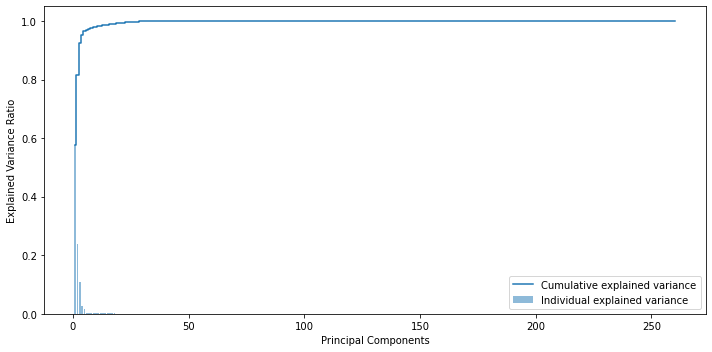

In [50]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, 261), pca.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, 261), var_cumu, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [51]:
#From above we can understand, 17 components alone can explain 99% variance

In [52]:
pca_17 = PCA(n_components=17)  #specifying 11 PC components
pca_17.fit(X)

# Eigen Vectors
pd.DataFrame(pca_17.components_)

0         1         2         3         4         5             6    \
0   0.000719 -0.000023 -0.000276  0.002792 -0.000150 -0.000089  4.269197e-08   
1   0.000182  0.000728 -0.000164 -0.001091 -0.000200  0.000001  5.464563e-08   
2  -0.000137 -0.001708 -0.000344 -0.006992 -0.000334  0.000092  4.143036e-08   
3   0.002731  0.000202 -0.000476  0.004796 -0.000290 -0.000115  8.962547e-08   
4  -0.000574  0.003980  0.000340 -0.022202 -0.000199  0.000229 -1.034862e-07   
5  -0.001252  0.003621  0.006282  0.288853 -0.000437 -0.002954 -4.290993e-08   
6   0.002126  0.008754 -0.003765 -0.410769  0.004190  0.003904 -1.568518e-06   
7   0.003526 -0.002289  0.012790  0.645607 -0.004932 -0.006400  2.047299e-06   
8  -0.003823  0.002788  0.013255  0.498949 -0.002785 -0.004927  1.220764e-06   
9   0.003100  0.003966  0.005474  0.086986 -0.002710 -0.001126  2.632184e-07   
10 -0.012384  0.009173  0.004594  0.049356 -0.000993 -0.000011 -1.079695e-06   
11  0.001074  0.000601  0.000944  0.076731 -0.001704  0.000064  1.029900e-08   
12  0.003356  0.002128  0.004185  0.017937 -0.001422  0.000293 -6.064356e-07   
13 -0.003742 -0.006968  0.001137  0.013639 -0.000705  0.000144  7.550066e-07   
14 -0.007145 -0.000090 -0.004864 -0.027505  0.000191  0.000419  4.341698e-07   
15  0.000405  0.009678 -0.003188 -0.004464  0.000189  0.000264 -1.406878e-07   
16 -0.002111 -0.008151  0.002004  0.006500  0.008489  0.000308 -1.103126e-06   

             7             8             9    ...       250           251  \
0  -3.388628e-07 -2.924687e-08 -5.330835e-09  ...  0.000261 -4.216742e-08   
1   4.811874e-07 -1.291972e-07  2.508005e-09  ...  0.000117 -1.526304e-06   
2  -1.141551e-07  5.994459e-08 -5.341299e-08  ... -0.000519 -5.291582e-07   
3  -1.792674e-06  7.969086e-07  9.585186e-08  ... -0.001451 -3.986094e-06   
4   4.810946e-06 -1.590790e-07  6.429283e-07  ... -0.000584  1.355849e-06   
5  -1.373808e-05  1.844448e-06  1.579189e-07  ...  0.001198  5.901342e-06   
6   1.162458e-05  2.873871e-07 -5.309851e-07  ...  0.008207  1.284397e-05   
7  -1.022241e-05  1.093565e-06  4.614710e-07  ...  0.002837  1.736526e-05   
8  -4.345632e-06  1.549536e-06  6.448037e-07  ...  0.002726 -5.931915e-06   
9   3.490916e-06  1.097985e-06  1.538770e-06  ...  0.008369  5.944358e-06   
10 -1.761872e-07 -7.211422e-07 -1.022625e-07  ... -0.004610 -2.273514e-05   
11 -5.571734e-06 -1.732019e-06  9.907085e-07  ...  0.006121  3.011973e-05   
12  3.558747e-07 -2.325525e-06 -5.636506e-08  ... -0.004567 -8.101125e-06   
13  5.973654e-06  2.507075e-07  1.335785e-06  ...  0.010918  3.781919e-05   
14 -3.830354e-06 -4.173086e-07  6.341813e-08  ...  0.016365  6.511520e-05   
15  1.188525e-05 -1.281948e-06  7.807618e-07  ...  0.015140  4.768307e-05   
16 -2.657875e-06  4.005450e-06  6.399679e-08  ...  0.003118 -1.549589e-06   

             252           253       254           255           256  \
0   1.700569e-08 -1.440965e-08 -0.000192  6.662328e-09 -4.718103e-08   
1  -5.020646e-08 -2.442320e-08  0.000058 -9.184026e-10 -7.738310e-08   
2   3.409130e-08 -1.727143e-08 -0.000763 -2.518430e-08 -8.609530e-08   
3  -5.542628e-08 -1.287734e-07 -0.000064 -6.258904e-08 -1.601333e-07   
4  -5.376686e-08  5.493517e-07  0.007031 -1.184591e-07  6.259883e-07   
5   7.417475e-07  3.387679e-07 -0.000137  6.512820e-09 -3.304956e-07   
6   1.173041e-07  1.910096e-07  0.000799  2.337688e-07 -2.205644e-06   
7   4.611244e-07 -4.670238e-07 -0.002495  1.497638e-07 -9.709516e-07   
8  -8.542533e-07  4.747504e-08  0.006237  8.311940e-09  1.435925e-06   
9   2.573513e-06  2.726010e-06 -0.002185 -3.670737e-07  5.775999e-07   
10 -1.148277e-07 -3.573779e-07  0.000528  1.989832e-07 -1.975696e-06   
11  4.194227e-07  1.784869e-07 -0.006976  2.626882e-07  1.782993e-06   
12  8.096747e-08  2.999689e-07  0.002439 -2.890651e-07  9.285473e-07   
13 -6.263292e-07 -5.563805e-07  0.002337 -7.707127e-08  6.835093e-07   
14  7.948628e-07  3.136034e-08 -0.005038 -1.857538e-07  1.585782e-07   
15 -6.453521e-07 -1.037085e-0

In [53]:
# Eigen Values 
pca_17.explained_variance_

array([43225957.26289375, 17918308.16543024,  8240755.88288122,
        1997330.32443667,  1132671.01559935,   263882.44768192,
         217372.0530031 ,   200175.35752907,   183868.56565523,
         158168.43860049,   113654.69102918,   109384.48870707,
         104647.81779573,   100199.91148331,    93547.45271858,
          84926.42926899,    82326.63899873])

In [54]:
sum(pca_17.explained_variance_ratio_)
#we are getting 99% with choosen 17 PC

0.990307058625756

In [55]:
pca_final =  pca_17.transform(X)
print('shape of original set is       ',p1data_new.shape)
print('shape of final PCA model set is',pca_final.shape)

shape of original set is        (1567, 261)
shape of final PCA model set is (1567, 17)


<AxesSubplot:>

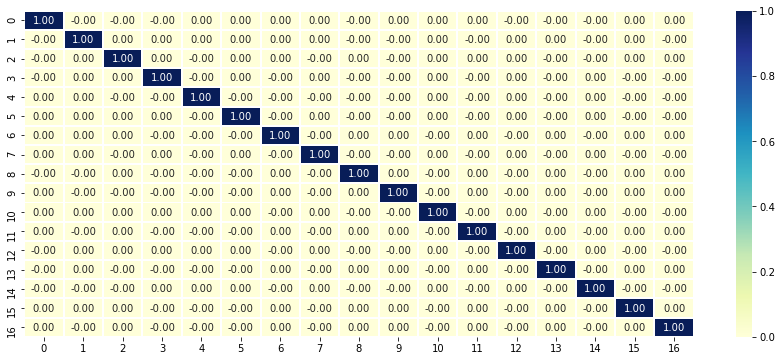

In [56]:
corrmat = np.corrcoef(pca_final.T)

#correlation heatmap
plt.figure(figsize=[15,6])
sns.heatmap(corrmat, fmt = ".2f",annot=True,lw=1,cmap = 'YlGnBu')

In [105]:
#with PCA multi collinarity is removed and can see zero correlation among features

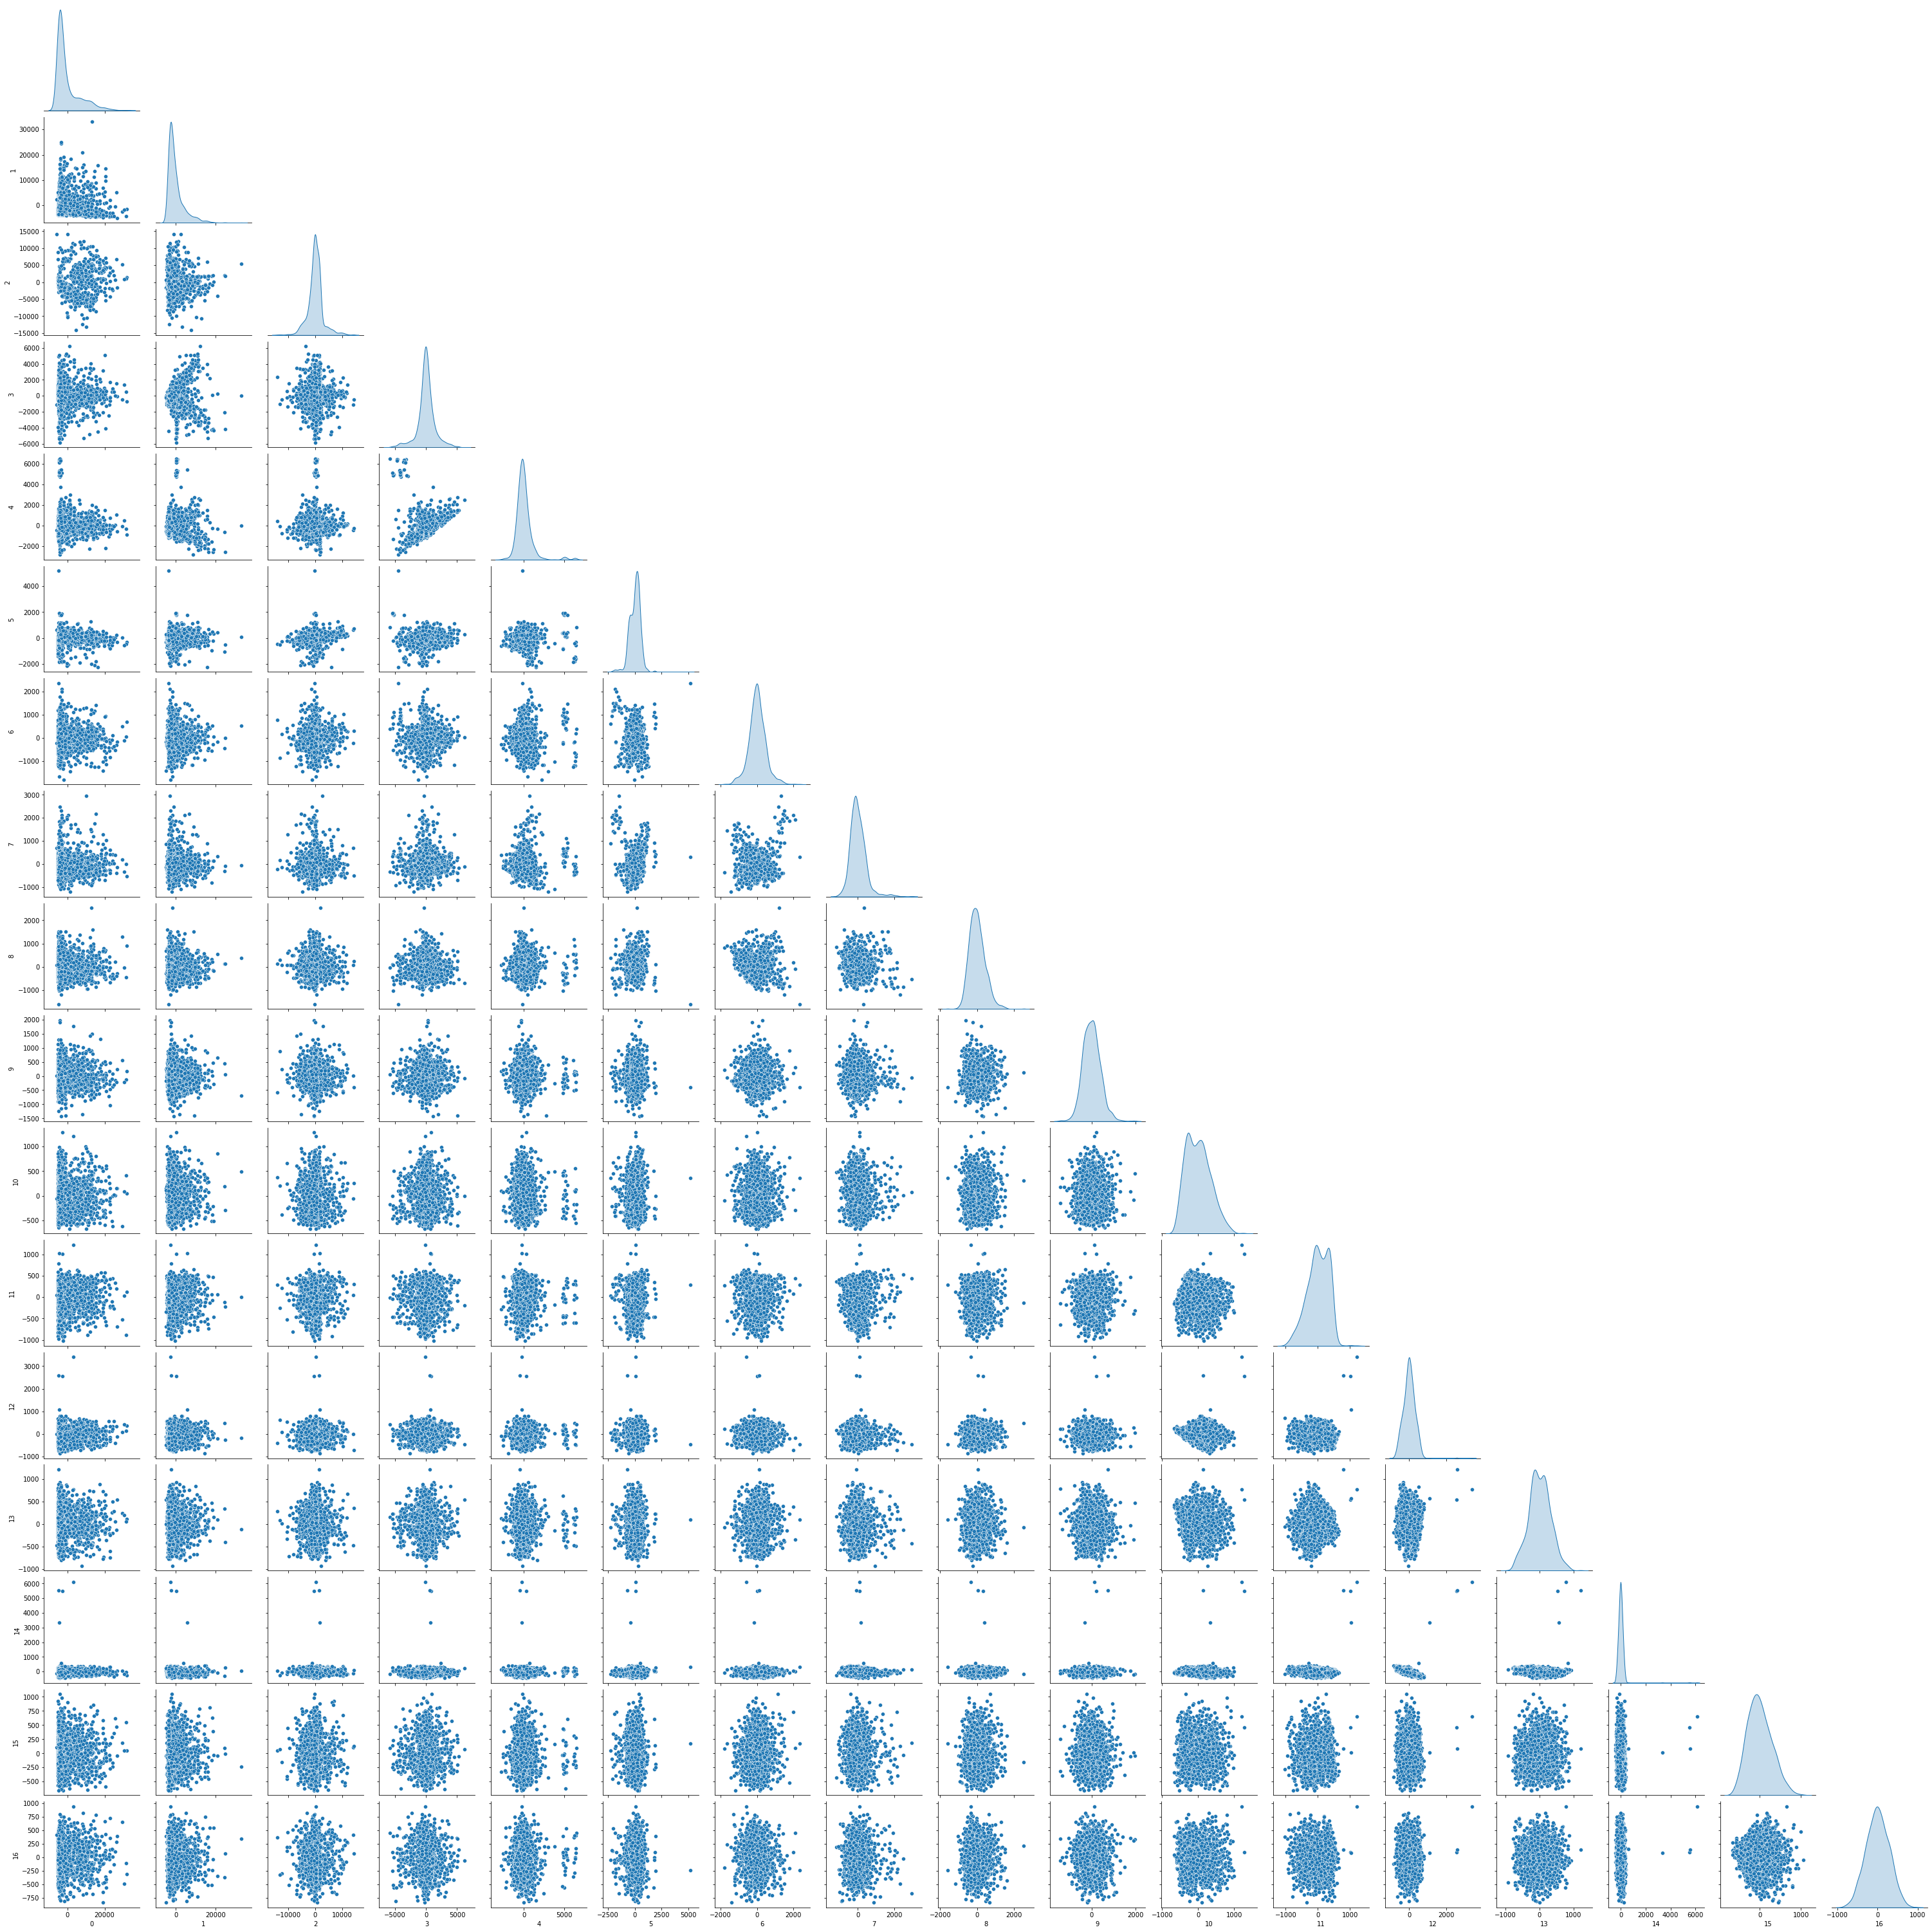

In [106]:
# Visualising PCA dimensions with pair plot
sns.pairplot(pd.DataFrame(pca_final),diag_kind = 'kde',corner=True)

In [107]:
pd.DataFrame(pca_final).head(5)

0            1            2           3           4           5   \
0 -4662.797165 -2742.519216   672.475931   -7.384514  351.844152 -142.129208   
1 -1625.866742 -3639.886980 -1511.819047 -320.454231 -540.928256  402.299723   
2 -2756.067114 -3126.095098 -1863.762016  116.217951 -129.729330   53.093719   
3 -1717.451615  -537.528054 -1512.149813  605.429418  213.285882   21.410787   
4 -3499.367387 -2121.622024   124.336107  150.431026 -123.189926  286.969602   

           6           7           8           9           10          11  \
0  710.766508   81.267510  598.836159 -191.673534 -205.267550  338.764248   
1  435.690646 -377.441800  753.384904 -461.651637 -480.044481  191.420644   
2  132.662431  444.028154 -151.266211  461.432027  -93.895768  390.763125   
3  -23.916540 -424.679905 -379.454537 -722.504768 -231.485971  -92.849246   
4  303.642498 -182.246299  180.526586  215.004094 -471.602911 -104.407185   

           12          13          14          15          16  
0  -42.481484  -30.939024   26.954906  528.774168    4.845615  
1   99.771411  202.813771 -109.368564  -66.020209  294.941076  
2  164.336675 -186.477198  -82.944133   67.170182  373.060426  
3 -110.057521 -517.252479  187.375539 -152.152961  -60.519939  
4   42.547341  504.958124  -34.712801 -330.249174   66.735744

In [111]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(pca_final)
X = scaler.transform(pca_final)

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (1253, 17)
y_train shape:  (1253,)
x_test shape:  (314, 17)
y_test shape:  (314,)


In [112]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
gs_nb = GaussianNB()

gs_nb.fit(x_train, y_train.ravel())

#Performance of model with training data
train_predict = gs_nb.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict)))
print()

#Performance of model with test data
test_predict = gs_nb.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict)))

Model Accuracy with Train Data: 0.9122

Model Accuracy with Test Data: 0.9140


In [ ]:
#we can observe the accuracy improvement after PCA. Accuaracy has been increased from 85.4 to 91.4

In [59]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

          -1       0.93      0.98      0.95       293
           1       0.12      0.05      0.07        21

    accuracy                           0.91       314
   macro avg       0.53      0.51      0.51       314
weighted avg       0.88      0.91      0.90       314



Precision – What percent of your predictions were correct Recall – What percent of the positive cases did you catch F1 score – What percent of positive predictions were correct support is the number of occurence of the given class in your dataset

For Pass, We have 93% predictions(Precision) correct and able to caught 98%(Recall) positive cases correctly and 95%(F1 Score) of postive predictions are correct

For Fail, We have 12% predictions(Precision) correct and able to caught 05%(Recall) positive cases correctly and 7%(F1 Score) of postive predictions are correct

Support numbers- For every 314 occurences we have 293 Pass occurances 21 Fail occurances

Overall accuracy is 91%

# Train All Models

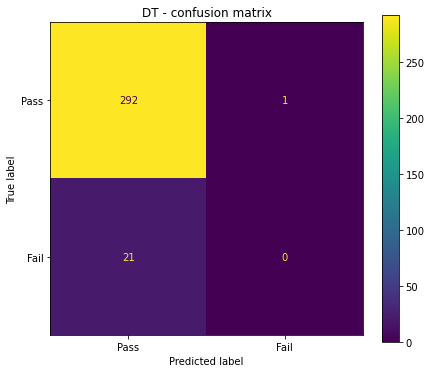

Accuracy Score Test: 0.9299363057324841
Accuracy Score Train: 0.936951316839585



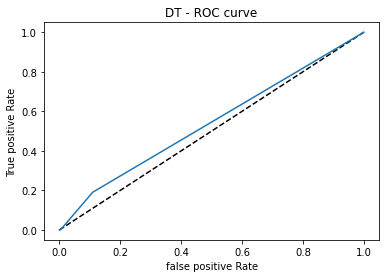

AUC SCore (ROC): 0.5403055420120267 



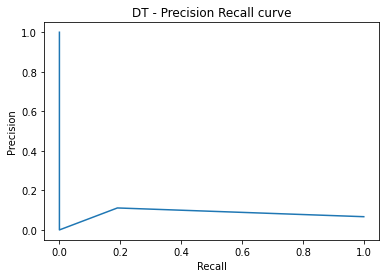

F1 score: 0.0 
AUC Score (PR): 0.08262561924982306



Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.936951       0.929936       0.540306       0.0   

   PR AUC_Score  
0      0.082626

In [63]:
#Build Decision Tree Model
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(x_train, y_train)

y_pred = dTreeR.predict(x_test)
y_pred_prob = dTreeR.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, dTreeR, y_pred, 'DT')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'DT')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'DT')

#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'Train accuracy': [dTreeR.score(x_train, y_train)],'Test accuracy':[dTreeR.score(x_test,y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

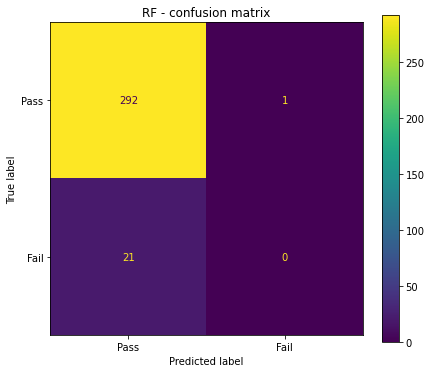

Accuracy Score Test: 0.9299363057324841
Accuracy Score Train: 1.0



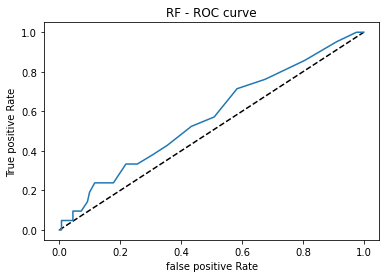

AUC SCore (ROC): 0.5707784820412807 



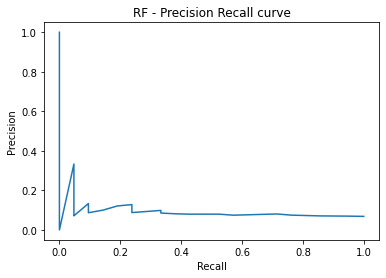

F1 score: 0.0 
AUC Score (PR): 0.08811777473631999



Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.936951       0.929936       0.540306       0.0   
0  Random Forest        1.000000       0.929936       0.570778       0.0   

   PR AUC_Score  
0      0.082626  
0      0.088118

In [64]:
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(x_train, y_train)

y_pred = rfcl.predict(x_test)
y_pred_prob = rfcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, rfcl, y_pred, 'RF')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'RF')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'RF')

tempResultsDf = pd.DataFrame({'Method':['Random Forest'],'Train accuracy': [rfcl.score(x_train, y_train)], 'Test accuracy': [rfcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

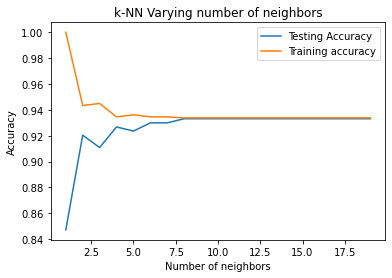

In [65]:
#let us first observe the accuracies for different values of k for KNN
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 
    
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

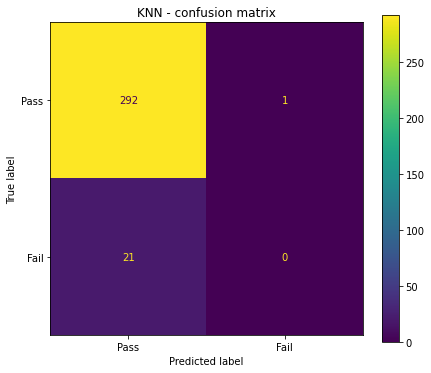

Accuracy Score Test: 0.9299363057324841
Accuracy Score Train: 0.9345570630486831



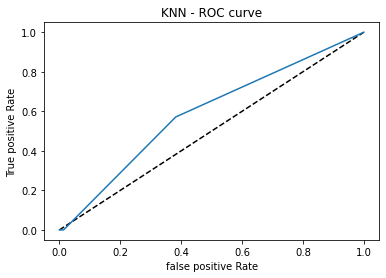

AUC SCore (ROC): 0.59068746952706 



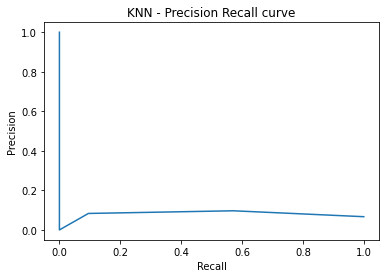

F1 score: 0.0 
AUC Score (PR): 0.08191953584392458



Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.936951       0.929936       0.540306       0.0   
0  Random Forest        1.000000       0.929936       0.570778       0.0   
0            KNN        0.934557       0.929936       0.590687       0.0   

   PR AUC_Score  
0      0.082626  
0      0.088118  
0      0.081920

In [67]:
# #We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)

# fitting the model
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
y_pred_prob = knn.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, knn, y_pred, 'KNN')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'KNN')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'KNN')

#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['KNN'],'Train accuracy': [knn.score(x_train, y_train)], 'Test accuracy': [knn.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

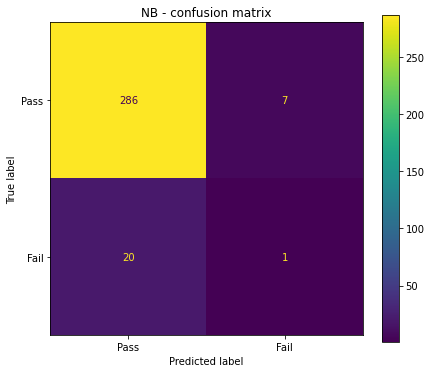

Accuracy Score Test: 0.9140127388535032
Accuracy Score Train: 0.9122106943335994



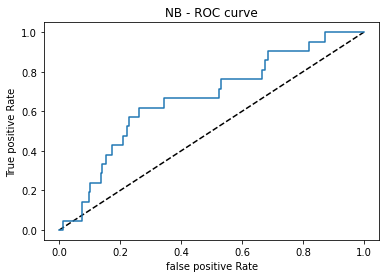

AUC SCore (ROC): 0.666504144319844 



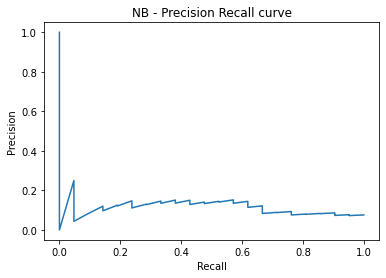

F1 score: 0.06896551724137931 
AUC Score (PR): 0.11071928807470177



Method  Train accuracy  Test accuracy  ROC AUC Score  F1 Score  \
0  Decision Tree        0.936951       0.929936       0.540306  0.000000   
0  Random Forest        1.000000       0.929936       0.570778  0.000000   
0            KNN        0.934557       0.929936       0.590687  0.000000   
0    Naive Bayes        0.912211       0.914013       0.666504  0.068966   

   PR AUC_Score  
0      0.082626  
0      0.088118  
0      0.081920  
0      0.110719

In [68]:
# create the model
nb = GaussianNB()

nb.fit(x_train, y_train.ravel())

y_pred = nb.predict(x_test)
y_pred_prob = nb.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, nb, y_pred, 'NB')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'NB')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'NB')

tempResultsDf = pd.DataFrame({'Method':['Naive Bayes'],'Train accuracy': [nb.score(x_train, y_train)], 'Test accuracy': [nb.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

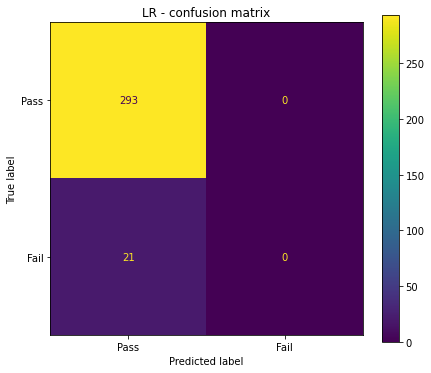

Accuracy Score Test: 0.9331210191082803
Accuracy Score Train: 0.9337589784517158



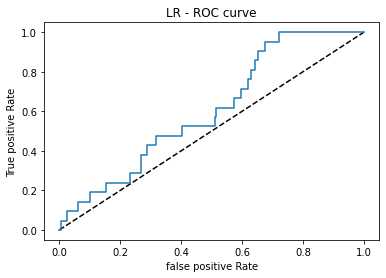

AUC SCore (ROC): 0.6066959206890947 



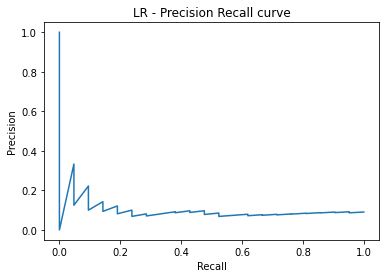

F1 score: 0.0 
AUC Score (PR): 0.09402972644549223



Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.936951       0.929936       0.540306   
0        Random Forest        1.000000       0.929936       0.570778   
0                  KNN        0.934557       0.929936       0.590687   
0          Naive Bayes        0.912211       0.914013       0.666504   
0  Logistic Regression        0.933759       0.933121       0.606696   

   F1 Score  PR AUC_Score  
0  0.000000      0.082626  
0  0.000000      0.088118  
0  0.000000      0.081920  
0  0.068966      0.110719  
0  0.000000      0.094030

In [70]:
from sklearn.linear_model import LogisticRegression

# Fit the model on train
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)
y_pred_prob = lr.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, lr, y_pred, 'LR')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'LR')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'LR')

tempResultsDf = pd.DataFrame({'Method':['Logistic Regression'],'Train accuracy': [lr.score(x_train, y_train)], 'Test accuracy': [lr.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

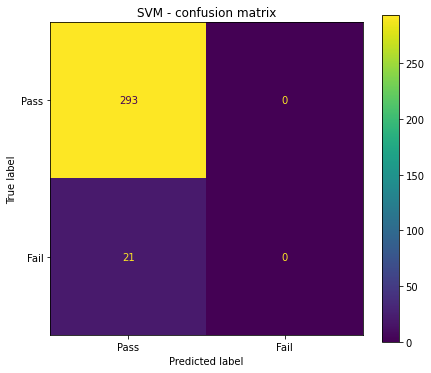

Accuracy Score Test: 0.9331210191082803
Accuracy Score Train: 0.9361532322426177



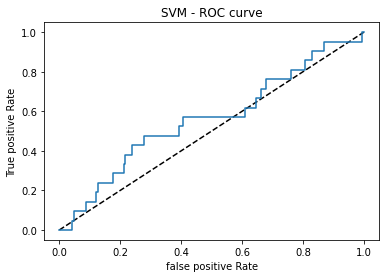

AUC SCore (ROC): 0.5620022753128555 



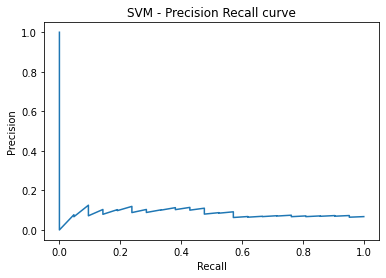

F1 score: 0.0 
AUC Score (PR): 0.0819874004125893



Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.936951       0.929936       0.540306   
0        Random Forest        1.000000       0.929936       0.570778   
0                  KNN        0.934557       0.929936       0.590687   
0          Naive Bayes        0.912211       0.914013       0.666504   
0  Logistic Regression        0.933759       0.933121       0.606696   
0                  SVM        0.936153       0.933121       0.562002   

   F1 Score  PR AUC_Score  
0  0.000000      0.082626  
0  0.000000      0.088118  
0  0.000000      0.081920  
0  0.068966      0.110719  
0  0.000000      0.094030  
0  0.000000      0.081987

In [71]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data with default parameters
svc = SVC(probability=True)
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)
y_pred_prob = svc.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, svc, y_pred, 'SVM')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'SVM')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'SVM')

tempResultsDf = pd.DataFrame({'Method':['SVM'],'Train accuracy': [svc.score(x_train, y_train)], 'Test accuracy': [svc.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

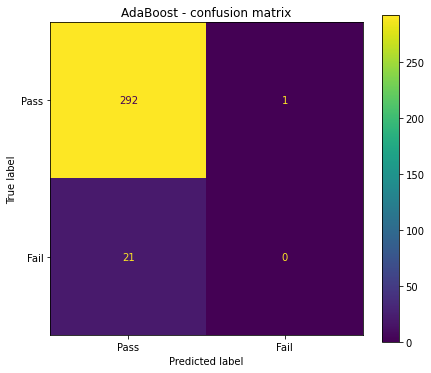

Accuracy Score Test: 0.9299363057324841
Accuracy Score Train: 0.9361532322426177



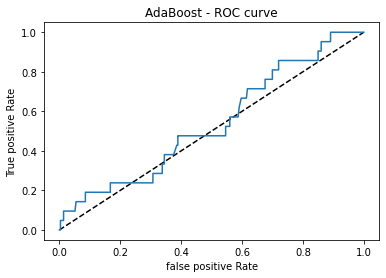

AUC SCore (ROC): 0.5389241020640337 



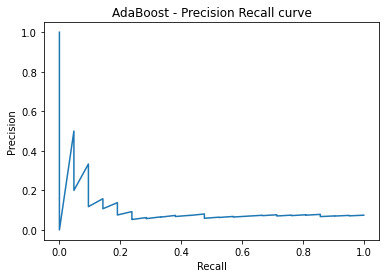

F1 score: 0.0 
AUC Score (PR): 0.09406669631211642



Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.936951       0.929936       0.540306   
0        Random Forest        1.000000       0.929936       0.570778   
0                  KNN        0.934557       0.929936       0.590687   
0          Naive Bayes        0.912211       0.914013       0.666504   
0  Logistic Regression        0.933759       0.933121       0.606696   
0                  SVM        0.936153       0.933121       0.562002   
0             AdaBoost        0.936153       0.929936       0.538924   

   F1 Score  PR AUC_Score  
0  0.000000      0.082626  
0  0.000000      0.088118  
0  0.000000      0.081920  
0  0.068966      0.110719  
0  0.000000      0.094030  
0  0.000000      0.081987  
0  0.000000      0.094067

In [72]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( n_estimators= 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(x_train, y_train)

y_pred = abcl.predict(x_test)
y_pred_prob = abcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, abcl, y_pred, 'AdaBoost')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'AdaBoost')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'AdaBoost')

tempResultsDf = pd.DataFrame({'Method':['AdaBoost'],'Train accuracy': [abcl.score(x_train, y_train)], 'Test accuracy': [abcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

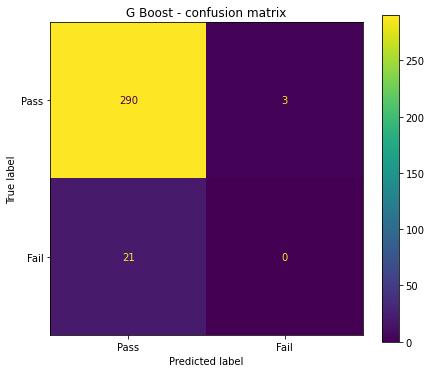

Accuracy Score Test: 0.9235668789808917
Accuracy Score Train: 0.945730247406225



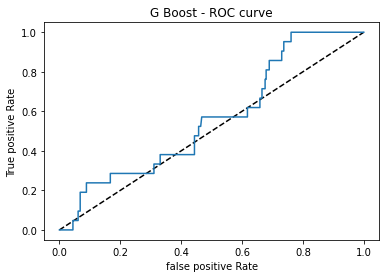

AUC SCore (ROC): 0.563546237607671 



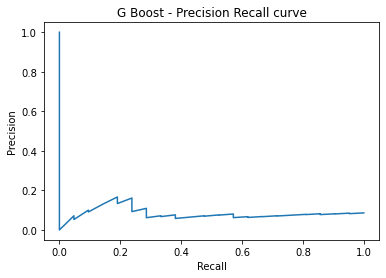

F1 score: 0.0 
AUC Score (PR): 0.08153233038492991



Method  Train accuracy  Test accuracy  ROC AUC Score  \
0        Decision Tree        0.936951       0.929936       0.540306   
0        Random Forest        1.000000       0.929936       0.570778   
0                  KNN        0.934557       0.929936       0.590687   
0          Naive Bayes        0.912211       0.914013       0.666504   
0  Logistic Regression        0.933759       0.933121       0.606696   
0                  SVM        0.936153       0.933121       0.562002   
0             AdaBoost        0.936153       0.929936       0.538924   
0        GradientBoost        0.945730       0.923567       0.563546   

   F1 Score  PR AUC_Score  
0  0.000000      0.082626  
0  0.000000      0.088118  
0  0.000000      0.081920  
0  0.068966      0.110719  
0  0.000000      0.094030  
0  0.000000      0.081987  
0  0.000000      0.094067  
0  0.000000      0.081532

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(x_train, y_train)

y_pred = gbcl.predict(x_test)
y_pred_prob = gbcl.predict_proba(x_test)

confusion_matrix_plot(x_train,y_train,x_test,y_test, gbcl, y_pred, 'G Boost')
roc_curve_auc_score(x_test,y_test,y_pred_prob, 'G Boost')
precision_recall_curve_and_scores(x_test,y_test,y_pred,y_pred_prob, 'G Boost')

tempResultsDf = pd.DataFrame({'Method':['GradientBoost'],'Train accuracy': [gbcl.score(x_train, y_train)], 'Test accuracy': [gbcl.score(x_test, y_test)],'ROC AUC Score':[score],'F1 Score':[f1_score_result],'PR AUC_Score': [auc_score_result]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'Train accuracy','Test accuracy','ROC AUC Score','F1 Score', 'PR AUC_Score']]
resultsDf

ROC Curve: Shows the diagnostic ability of a model by bringing together true positive rate (TPR) and false positive rate (FPR) for different thresholds of class predictions (e.g. thresholds of 10%, 50% or 90% resulting to a prediction of churn)

AUC (for ROC): Measures the overall separability between classes of the model related to the ROC curve

Precision-Recall-Curve: Shows the diagnostic ability by comparing false positive rate (FPR) and false negative rate (FNR) for different thresholds of class predictions. It is suitable for data sets with high class imbalances (negative values overrepresented) as it focuses on precision and recall, which are not dependent on the number of true negatives and thereby excludes the imbalance

F1 Score: Builds the harmonic mean of precision and recall and thereby measures the compromise between both.

AUC (for PRC): Measures the overall separability between classes of the model related to the Precision-Recall curve

From above we can observe Logistic Regression and SVM acheived best test accuracies. Logistic regression fitted closely.

Naive bayes also achieved best result bit lower than logistc regression accuracy.ROC AUC score for Naive bayes is high among all models.

But Logistic regression achieved high accuracy. So Best model is Logic regression

In [81]:
def GetModel():
    basedModels = []
    basedModels.append(('DT' , DecisionTreeClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    
    return basedModels

In [89]:
def EvalModel(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 20
    SEED = 7
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
        print(msg)
        
    return names, results

In [90]:
models = GetModel()
names,results = EvalModel(x_train, y_train,models)

DT: 85.953661 (3.503660)
RF: 93.297491 (0.941625)
KNN: 93.297491 (0.618670)
NB: 90.985663 (2.256271)
LR: 93.297491 (0.618670)
SVM: 93.376856 (0.553676)
AB: 92.101895 (1.540370)
GBM: 93.140041 (1.225660)


#From cross validation of average scores we can observe RandomForest,KNN,Logistic regression , SVM and Gradient boost are prodcuing decent accuracies.

KNN and Logistic Regression average score is 93.29 and max score is 93.9

Form above scores observed that KNN little overfitted with trian data and having less ROC AUC score than Logistic regression

# #Hyper parmater Tuning

In [99]:

from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

lr_rand = RandomizedSearchCV(estimator = lr, 
                 param_distributions=hyperparameters, 
                 cv=10,  
                 verbose=1, 
                 scoring='accuracy')

lr_rand.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=10, estimator=LogisticRegression(solver='liblinear'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022B87F62C10>,
                                        'penalty': ['l1', 'l2']},
                   scoring='accuracy', verbose=1)

In [100]:
print('Logistic Regression - Best Parameters: ',lr_rand.best_params_)

Logistic Regression - Best Parameters:  {'C': 3.00310021658099, 'penalty': 'l1'}


In [103]:
#Performance of model with training data
lrtrain_predict = lr_rand.predict(x_train)

print("Model Accuracy with Train Data: {0:.4f}".format(metrics.accuracy_score(y_train, lrtrain_predict)))
print()

#Performance of model with test data
lrtest_predict = lr_rand.predict(x_test)

print("Model Accuracy with Test Data: {0:.4f}".format(metrics.accuracy_score(y_test, lrtest_predict)))

Model Accuracy with Train Data: 0.9338

Model Accuracy with Test Data: 0.9331


In [ ]:
#with Random SearchCV Accuracy has been increased from 93.29 to 93.31%.

# Pickle trained model for future use

In [113]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr_rand)
  
# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)

In [159]:
# Save Trained Model
with open('WF_Final.pkl', 'wb') as fid:
    pickle.dump(lr_rand, fid)

In [160]:
WF_Final = pickle.load(open('WF_Final.pkl', 'rb'))

In [118]:
fdata = pd.read_excel(r'C:\Users\ascd0\Downloads\Future_predictions.xlsx')

In [119]:
fdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 591 entries, Time to 589
dtypes: datetime64[ns](1), float64(458), int64(132)
memory usage: 83.2 KB


In [120]:
fdata.head(5)

Time        0        1          2          3       4    5  \
0 2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100   
1 2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100   
2 2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100   
3 2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100   
4 2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100   

          6       7       8  ...     580       581     582     583     584  \
0   97.6133  0.1242  1.5005  ...     NaN       NaN  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966  ...  0.0060  208.2045  0.5019  0.0223  0.0055   
2   95.4878  0.1241  1.4436  ...  0.0148   82.8602  0.4958  0.0157  0.0039   
3  104.2367  0.1217  1.4882  ...  0.0044   73.8432  0.4990  0.0103  0.0025   
4  100.3967  0.1235  1.5031  ...     NaN       NaN  0.4800  0.4766  0.1045   

       585     586     587     588       589  
0   2.3630     NaN     NaN     NaN       NaN  
1   4.4447  0.0096  0.0201  0.0060  208.2045  
2   3.1745  0.0584  0.0484  0.0148   82.8602  
3   2.0544  0.0202  0.0149  0.0044   73.8432  
4  99.3032  0.0202  0.0149  0.0044   73.8432  

[5 rows x 591 columns]

In [125]:
f_data=fdata.iloc[:,1:]

In [127]:
print("shape is",fdata.shape)
print("size is ",fdata.size)

shape is (18, 591)
size is  10638


In [129]:
# how many total missing values do we have?
total_cells = np.product(p1data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.05605477845426792

In [139]:
# we have very less % of missing values But missing values are in every row.We cant drop them.So Lets impute
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
f_data = pd.DataFrame(my_imputer.fit_transform(fdata.iloc[:,1:591]))

In [140]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Columns: 570 entries, 0 to 569
dtypes: float64(570)
memory usage: 80.3 KB


In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(f_data)
f_scale = scaler.transform(f_data)

pca = PCA(n_components=17)  #specifying 11 PC components
final=pca.fit_transform(f_scale)

In [157]:
final.shape

(18, 17)

In [161]:
WF_Final.predict(final)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
        1], dtype=int64)

# conclusion on the results.

Worked on dataset which is having

RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail

Performed EDA ,checked for zzero varaince and removed all highly correltead features. Trained all supervised models. Cross validated scores with CV techniques and hypertuned parmaeters. Naive Bayes achieved hih accuracy results.

Peformed PCA to reduce dimensioanlity reduction and reduced final features to 17.

Trained all supervised models. Cross validated scores with CV techniques and hypertuned parmaeters.

LOgistic regression achieved high accuracy results.

Pickled the model for future use and then used future dataset to predcit the pass/Fail values.
